Number of home games with 1.5 point spread and moneyline 130-210: 661
Number of away games with 1.5 point spread and moneyline 130-210: 1287

--- OVERALL PROFITABILITY ANALYSIS ---
Number of home teams with moneylines 130-210: 661
Number of away teams with moneylines 130-210: 1287

Home Team (ML 130-210):
Win Rate: 39.64%
Total Profit/Loss: $321.00
ROI: 0.49%

Away Team (ML 130-210):
Win Rate: 41.10%
Total Profit/Loss: $5631.00
ROI: 4.38%

--- SPREAD ODDS VS MONEYLINE PROFITABILITY FOR 1.5 POINT SPREADS ---

Home Team Profitability by Spread Odds (ML 130-210, Spread 1.5):
               bets   win_rate        roi
spread_bucket                            
-200.0           16  43.750000  10.500000
-180.0           24  41.666667   8.333333
-160.0           37  45.945946  16.486486
-140.0          161  34.161491 -19.043478
-120.0          272  41.544118   2.955882
 100.0          116  40.517241  11.508621
 120.0           30  43.333333  25.666667

Away Team Profitability by Spread Odds (ML

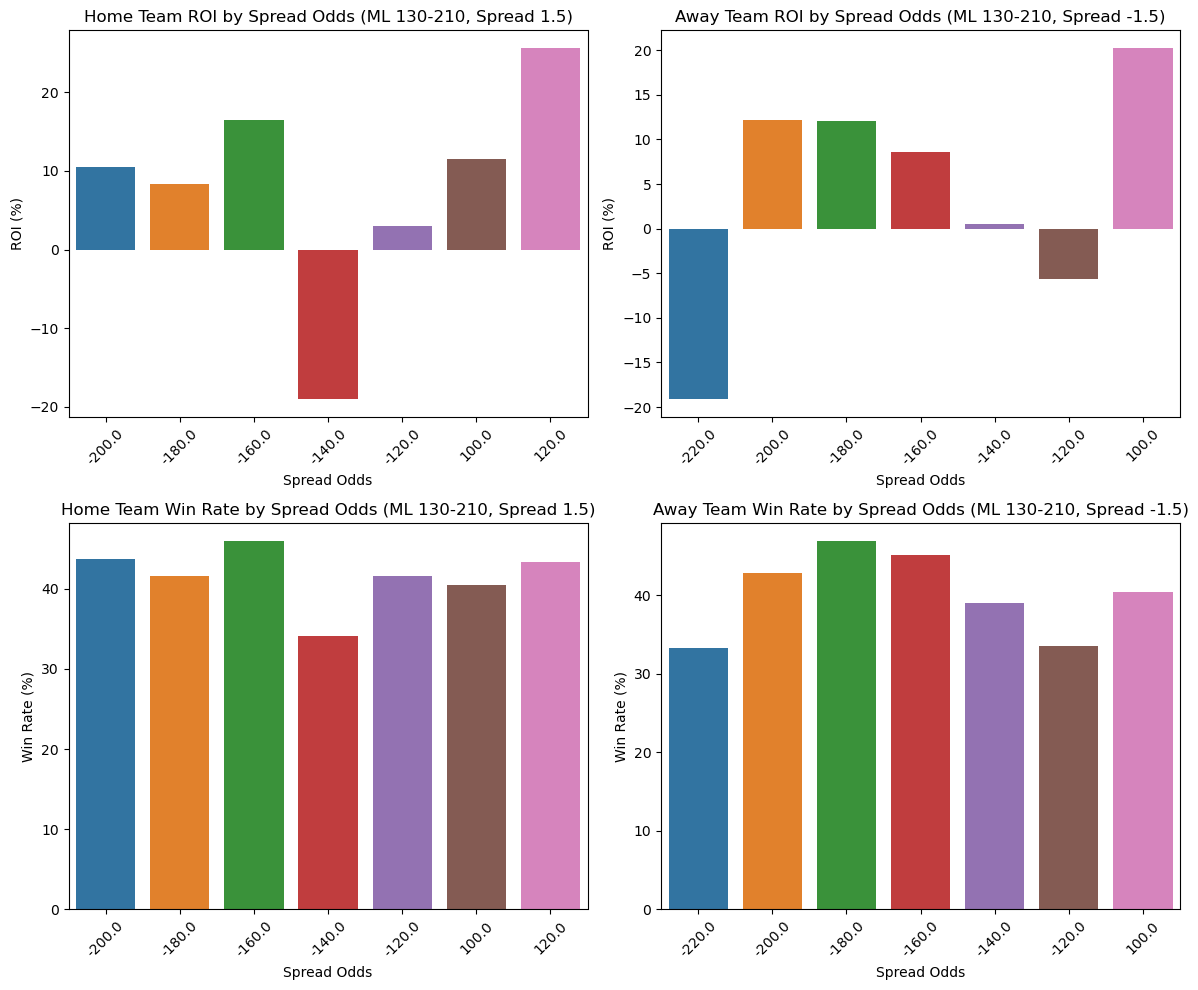


--- DETAILED MONEYLINE VALUE ANALYSIS FOR 1.5 POINT SPREADS ---

Home Team Profitability by Moneyline Value:
           bets   win_rate        roi
ml_bucket                            
130.0       213  39.436620  -7.962441
140.0       133  40.601504  -1.052632
150.0       104  40.384615   2.769231
160.0        57  40.350877   6.526316
170.0        47  44.680851  22.723404
180.0        38  39.473684  12.421053
190.0        35  42.857143  26.057143
200.0        28  17.857143 -45.892857

Away Team Profitability by Moneyline Value:
           bets   win_rate        roi
ml_bucket                            
130.0       358  46.089385   7.910615
140.0       231  43.722944   6.173160
150.0       189  41.269841   4.190476
160.0       176  42.613636  12.784091
170.0        76  38.157895   4.736842
180.0       107  32.710280  -7.383178
190.0        73  28.767123 -15.671233
200.0        58  36.206897   9.741379
210.0        19  21.052632 -34.736842


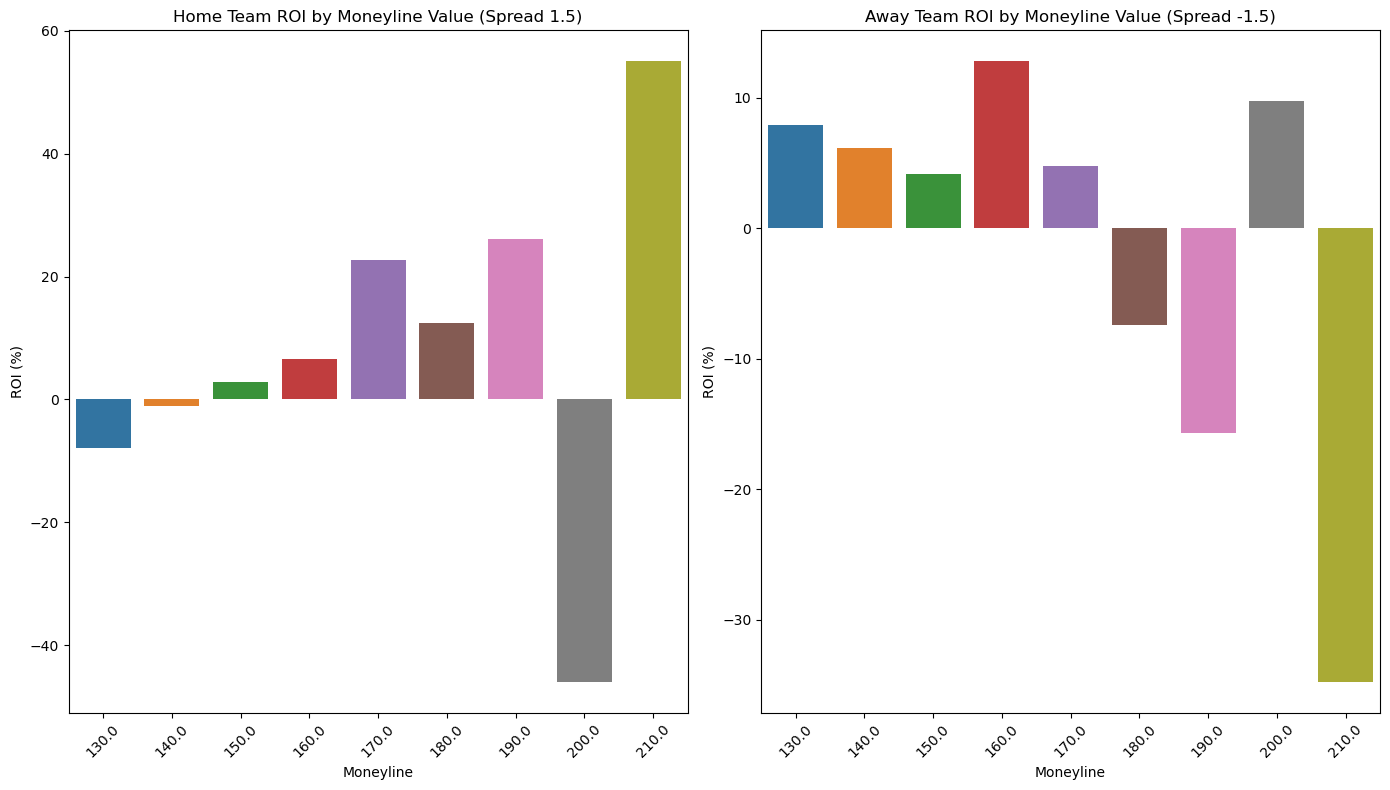


--- SUMMARY OF FINDINGS FOR 1.5 POINT SPREADS ---
1. Overall profitability of moneylines between 130-210 with 1.5 point spreads:
   - Home teams (1.5 spread): ROI = 0.49% (Sample size: 661)
   - Away teams (-1.5 spread): ROI = 4.38% (Sample size: 1287)
2. Most profitable home team spread odds (1.5 spread): 120.0 (ROI: 25.67%)
3. Most profitable away team spread odds (-1.5 spread): 100.0 (ROI: 20.26%)
4. Most profitable home team moneyline (1.5 spread): 210.0 (ROI: 55.00%)
5. Most profitable away team moneyline (-1.5 spread): 160.0 (ROI: 12.78%)

6. Key observations on relationship between moneyline profitability and 1.5 point spreads:
   - This analysis focuses exclusively on games with 1.5 point spreads
   - Smaller sample sizes may affect reliability of results
   - See detailed analysis in tables and charts above


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('Documents/MoneyLinesBetween130and210.csv')

# Function to calculate potential return on a $100 bet
def calculate_return(odds, is_win, stake=100):
    if not is_win:
        return 0
    
    if odds > 0:
        return stake + (odds/100) * stake  # Return stake + profit
    else:
        return stake + (100/abs(odds)) * stake  # Return stake + profit

# Data cleaning and preparation
df['home_win'] = df['home_score'] > df['away_score']
df['away_win'] = df['away_score'] > df['home_score']

# For home teams, we'll focus on games with a spread of 1.5
# For away teams, we'll also focus on games with a spread of 1.5
# Note: For away teams, spread is typically negative, so we'll use abs(spread) == 1.5

# Filter for moneylines between 130 and 210 with specific spread values
home_in_range = df[(df['home_money_line_odds'] >= 130) & 
                   (df['home_money_line_odds'] <= 210) & 
                   (df['spread'] == 1.5)].copy()  # Home team as favorite with 1.5 spread

away_in_range = df[(df['away_money_line_odds'] >= 130) & 
                   (df['away_money_line_odds'] <= 210) & 
                   (df['spread'] == -1.5)].copy()  # Away team as favorite with 1.5 spread

print(f"Number of home games with 1.5 point spread and moneyline 130-210: {len(home_in_range)}")
print(f"Number of away games with 1.5 point spread and moneyline 130-210: {len(away_in_range)}")

# Calculate returns for each game
home_in_range['return'] = home_in_range.apply(
    lambda row: calculate_return(row['home_money_line_odds'], row['home_win']), axis=1
)
away_in_range['return'] = away_in_range.apply(
    lambda row: calculate_return(row['away_money_line_odds'], row['away_win']), axis=1
)

home_in_range['profit'] = home_in_range['return'] - 100
away_in_range['profit'] = away_in_range['return'] - 100

# Calculate overall profitability
print("\n--- OVERALL PROFITABILITY ANALYSIS ---")
print(f"Number of home teams with moneylines 130-210: {len(home_in_range)}")
print(f"Number of away teams with moneylines 130-210: {len(away_in_range)}")

home_win_rate = home_in_range['home_win'].mean() * 100
away_win_rate = away_in_range['away_win'].mean() * 100
home_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100
away_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100

print(f"\nHome Team (ML 130-210):")
print(f"Win Rate: {home_win_rate:.2f}%")
print(f"Total Profit/Loss: ${home_in_range['profit'].sum():.2f}")
print(f"ROI: {home_roi:.2f}%")

print(f"\nAway Team (ML 130-210):")
print(f"Win Rate: {away_win_rate:.2f}%")
print(f"Total Profit/Loss: ${away_in_range['profit'].sum():.2f}")
print(f"ROI: {away_roi:.2f}%")

# Since we're focusing on 1.5 point spreads only, we'll focus on analyzing by spread odds 
# and moneyline value rather than spread value buckets
print("\n--- SPREAD ODDS VS MONEYLINE PROFITABILITY FOR 1.5 POINT SPREADS ---")

# Function to create buckets for analysis
def analyze_by_spread_odds(df, spread_odds_col, bucket_size=20):
    # Create spread odds buckets
    df['spread_bucket'] = (df[spread_odds_col] // bucket_size) * bucket_size
    
    # Group by spread bucket and calculate stats
    result = df.groupby('spread_bucket').agg(
        bets=('profit', 'count'),
        wins=('return', lambda x: (x > 0).sum()),
        profit_sum=('profit', 'sum')
    )
    
    result['win_rate'] = result['wins'] / result['bets'] * 100
    result['roi'] = result['profit_sum'] / (result['bets'] * 100) * 100
    
    # Filter out buckets with too few bets
    return result[result['bets'] >= 5].sort_index()  # Reduced minimum sample size to 5 since we're filtering

# Analyze home team spread odds for 1.5 point spreads
home_by_spread = analyze_by_spread_odds(home_in_range, 'home_spread_odds')
print("\nHome Team Profitability by Spread Odds (ML 130-210, Spread 1.5):")
print(home_by_spread[['bets', 'win_rate', 'roi']])

# Analyze away team spread odds for 1.5 point spreads
away_by_spread = analyze_by_spread_odds(away_in_range, 'away_spread_odds')
print("\nAway Team Profitability by Spread Odds (ML 130-210, Spread -1.5):")
print(away_by_spread[['bets', 'win_rate', 'roi']])

# Create visualizations
plt.figure(figsize=(12, 10))

# Home team ROI by spread odds
plt.subplot(2, 2, 1)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['roi'])
    plt.title('Home Team ROI by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team ROI (Spread 1.5)')

# Away team ROI by spread odds
plt.subplot(2, 2, 2)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['roi'])
    plt.title('Away Team ROI by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team ROI (Spread -1.5)')

# Win rate analysis
plt.subplot(2, 2, 3)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['win_rate'])
    plt.title('Home Team Win Rate by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team Win Rate (Spread 1.5)')

plt.subplot(2, 2, 4)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['win_rate'])
    plt.title('Away Team Win Rate by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team Win Rate (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_analysis_1.5point_spread.png')
plt.show()

# Since we're focusing only on specific spread values (1.5 for home, -1.5 for away),
# we'll skip the spread value bucket analysis and go directly to moneyline value analysis

# Deeper analysis by moneyline value within the range for 1.5 point spreads
print("\n--- DETAILED MONEYLINE VALUE ANALYSIS FOR 1.5 POINT SPREADS ---")

# Create moneyline value buckets
bucket_size = 10
home_in_range['ml_bucket'] = (home_in_range['home_money_line_odds'] // bucket_size) * bucket_size
away_in_range['ml_bucket'] = (away_in_range['away_money_line_odds'] // bucket_size) * bucket_size

# Group by moneyline bucket
home_by_ml = home_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

home_by_ml['win_rate'] = home_by_ml['wins'] / home_by_ml['bets'] * 100
home_by_ml['roi'] = home_by_ml['profit_sum'] / (home_by_ml['bets'] * 100) * 100

away_by_ml = away_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

away_by_ml['win_rate'] = away_by_ml['wins'] / away_by_ml['bets'] * 100
away_by_ml['roi'] = away_by_ml['profit_sum'] / (away_by_ml['bets'] * 100) * 100

print("\nHome Team Profitability by Moneyline Value:")
print(home_by_ml[home_by_ml['bets'] >= 10][['bets', 'win_rate', 'roi']].sort_index())

print("\nAway Team Profitability by Moneyline Value:")
print(away_by_ml[away_by_ml['bets'] >= 10][['bets', 'win_rate', 'roi']].sort_index())

# Plot profitability by moneyline value
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
home_ml_plot = home_by_ml[home_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not home_ml_plot.empty:
    sns.barplot(x=home_ml_plot.index, y=home_ml_plot['roi'])
    plt.title('Home Team ROI by Moneyline Value (Spread 1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Home Team ROI by Moneyline (Spread 1.5)')

plt.subplot(1, 2, 2)
away_ml_plot = away_by_ml[away_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not away_ml_plot.empty:
    sns.barplot(x=away_ml_plot.index, y=away_ml_plot['roi'])
    plt.title('Away Team ROI by Moneyline Value (Spread -1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Away Team ROI by Moneyline (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_value_analysis.png')
plt.show()

# Final summary
print("\n--- SUMMARY OF FINDINGS FOR 1.5 POINT SPREADS ---")
print("1. Overall profitability of moneylines between 130-210 with 1.5 point spreads:")
home_overall_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100 if len(home_in_range) > 0 else 0
away_overall_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100 if len(away_in_range) > 0 else 0
print(f"   - Home teams (1.5 spread): ROI = {home_overall_roi:.2f}% (Sample size: {len(home_in_range)})")
print(f"   - Away teams (-1.5 spread): ROI = {away_overall_roi:.2f}% (Sample size: {len(away_in_range)})")

# Find most profitable spread odds buckets
if len(home_by_spread) > 0:
    best_home_spread = home_by_spread['roi'].idxmax()
    print(f"2. Most profitable home team spread odds (1.5 spread): {best_home_spread} (ROI: {home_by_spread.loc[best_home_spread, 'roi']:.2f}%)")
if len(away_by_spread) > 0:
    best_away_spread = away_by_spread['roi'].idxmax()
    print(f"3. Most profitable away team spread odds (-1.5 spread): {best_away_spread} (ROI: {away_by_spread.loc[best_away_spread, 'roi']:.2f}%)")

# Find most profitable moneyline buckets
min_bets = 5  # Reduced threshold due to filtering
if len(home_by_ml[home_by_ml['bets'] >= min_bets]) > 0:
    best_home_ml = home_by_ml[home_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"4. Most profitable home team moneyline (1.5 spread): {best_home_ml} (ROI: {home_by_ml.loc[best_home_ml, 'roi']:.2f}%)")
if len(away_by_ml[away_by_ml['bets'] >= min_bets]) > 0:
    best_away_ml = away_by_ml[away_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"5. Most profitable away team moneyline (-1.5 spread): {best_away_ml} (ROI: {away_by_ml.loc[best_away_ml, 'roi']:.2f}%)")

print("\n6. Key observations on relationship between moneyline profitability and 1.5 point spreads:")
print("   - This analysis focuses exclusively on games with 1.5 point spreads")
print("   - Smaller sample sizes may affect reliability of results")
print("   - See detailed analysis in tables and charts above")

Number of home games with 1.5 point spread and moneyline 130-210: 661
Number of away games with 1.5 point spread and moneyline 130-210: 1287

--- OVERALL PROFITABILITY ANALYSIS ---
Number of home teams with moneylines 130-210: 661
Number of away teams with moneylines 130-210: 1287

Home Team (ML 130-210):
Win Rate: 39.64%
Total Profit/Loss: $321.00
ROI: 0.49%

Away Team (ML 130-210):
Win Rate: 41.10%
Total Profit/Loss: $5631.00
ROI: 4.38%

--- SPREAD ODDS VS MONEYLINE PROFITABILITY FOR 1.5 POINT SPREADS ---

Home Team Profitability by Spread Odds (ML 130-210, Spread 1.5):
               bets   win_rate        roi
spread_bucket                            
-200.0           16  43.750000  10.500000
-180.0           24  41.666667   8.333333
-160.0           37  45.945946  16.486486
-140.0          161  34.161491 -19.043478
-120.0          272  41.544118   2.955882
 100.0          116  40.517241  11.508621
 120.0           30  43.333333  25.666667

Away Team Profitability by Spread Odds (ML

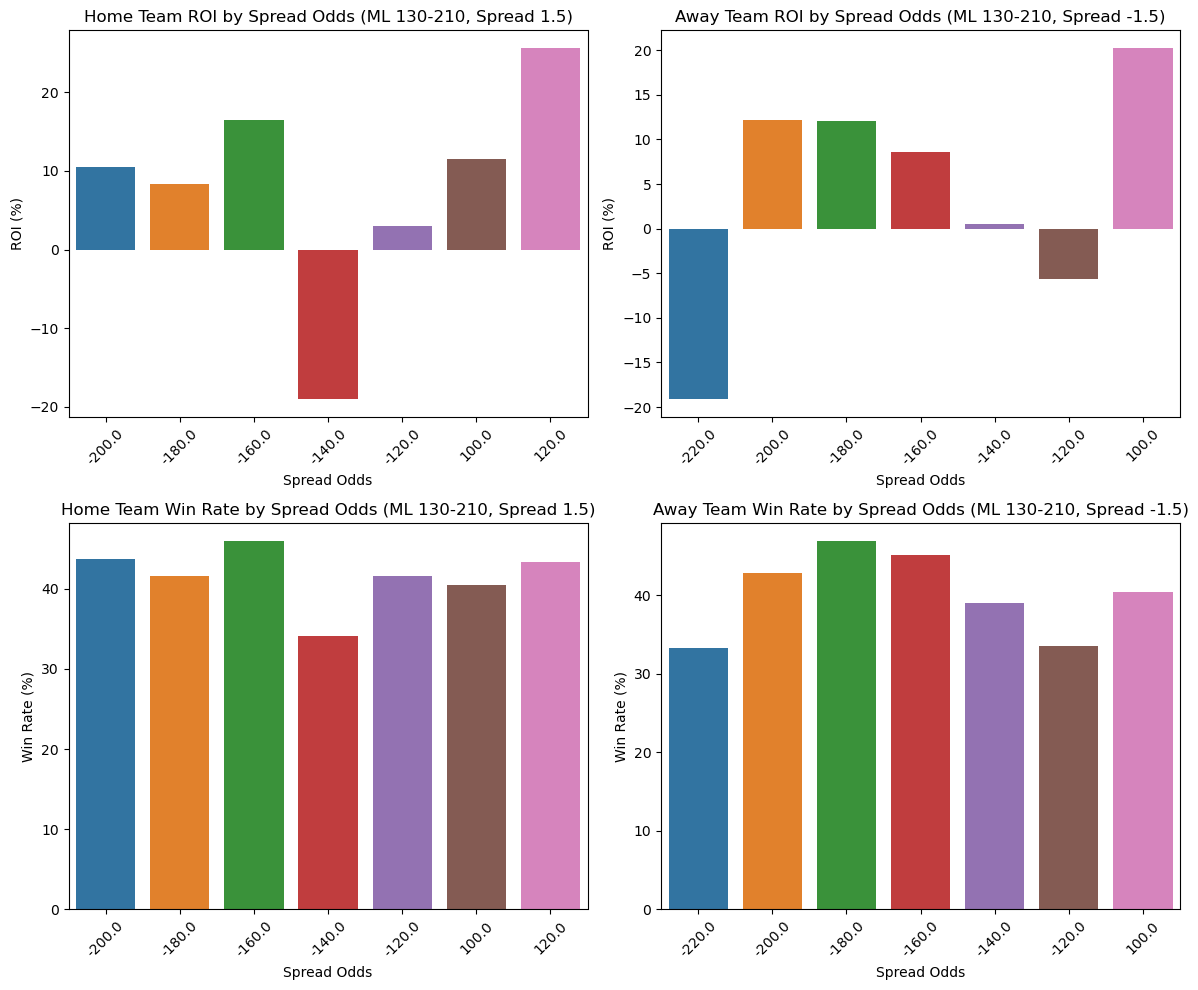


--- DETAILED MONEYLINE VALUE ANALYSIS FOR 1.5 POINT SPREADS ---

Home Team Profitability by Moneyline Value:
           bets   win_rate        roi
ml_bucket                            
130.0       213  39.436620  -7.962441
140.0       133  40.601504  -1.052632
150.0       104  40.384615   2.769231
160.0        57  40.350877   6.526316
170.0        47  44.680851  22.723404
180.0        38  39.473684  12.421053
190.0        35  42.857143  26.057143
200.0        28  17.857143 -45.892857

Away Team Profitability by Moneyline Value:
           bets   win_rate        roi
ml_bucket                            
130.0       358  46.089385   7.910615
140.0       231  43.722944   6.173160
150.0       189  41.269841   4.190476
160.0       176  42.613636  12.784091
170.0        76  38.157895   4.736842
180.0       107  32.710280  -7.383178
190.0        73  28.767123 -15.671233
200.0        58  36.206897   9.741379
210.0        19  21.052632 -34.736842


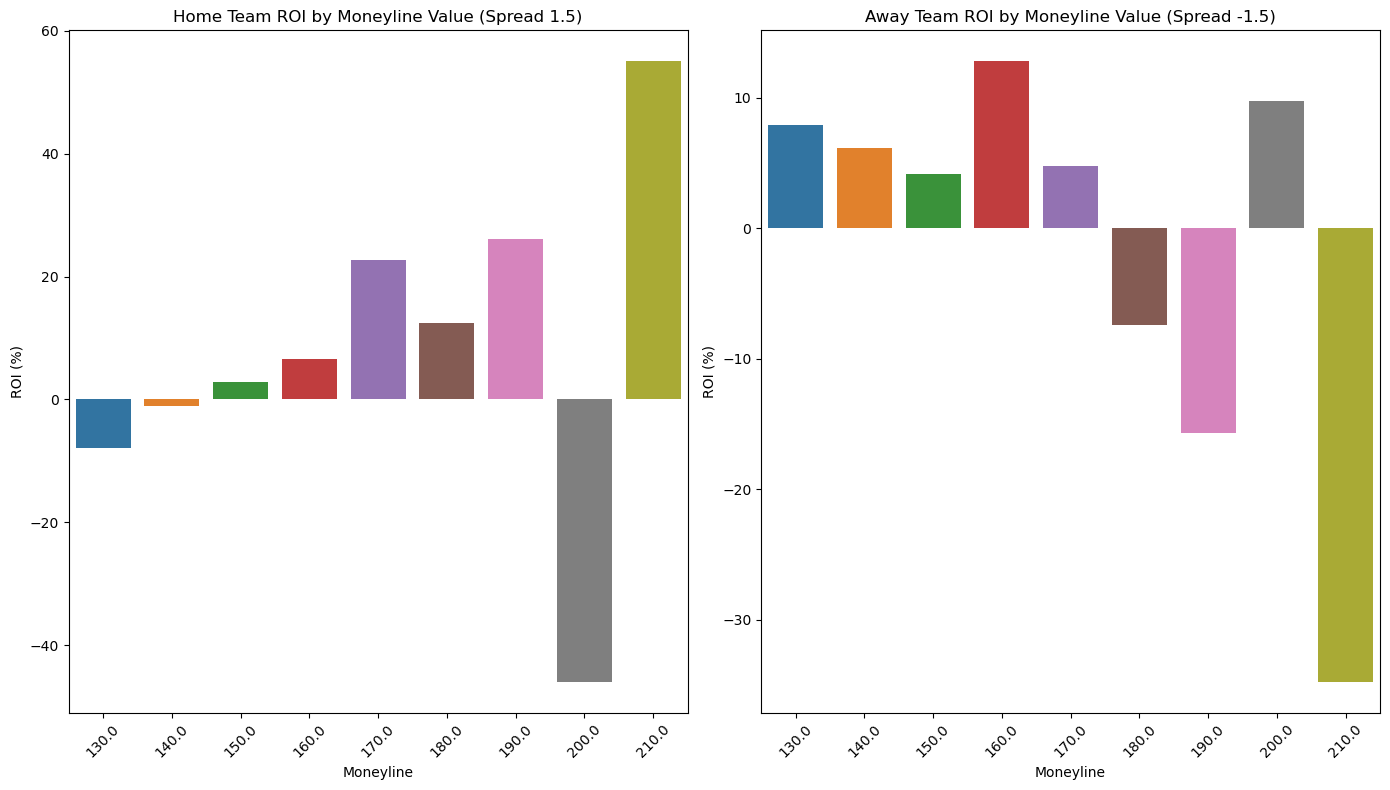


--- SUMMARY OF FINDINGS FOR 1.5 POINT SPREADS ---
1. Overall profitability of moneylines between 130-210 with 1.5 point spreads:
   - Home teams (1.5 spread): ROI = 0.49% (Sample size: 661)
   - Away teams (-1.5 spread): ROI = 4.38% (Sample size: 1287)
2. Most profitable home team spread odds (1.5 spread): 120.0 (ROI: 25.67%)
3. Most profitable away team spread odds (-1.5 spread): 100.0 (ROI: 20.26%)
4. Most profitable home team moneyline (1.5 spread): 210.0 (ROI: 55.00%)
5. Most profitable away team moneyline (-1.5 spread): 160.0 (ROI: 12.78%)

6. Key observations on relationship between moneyline profitability and 1.5 point spreads:
   - This analysis focuses exclusively on games with 1.5 point spreads
   - Smaller sample sizes may affect reliability of results
   - See detailed analysis in tables and charts above


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('Documents/MoneyLinesBetween130and210.csv')

# Function to calculate potential return on a $100 bet
def calculate_return(odds, is_win, stake=100):
    if not is_win:
        return 0
    
    if odds > 0:
        return stake + (odds/100) * stake  # Return stake + profit
    else:
        return stake + (100/abs(odds)) * stake  # Return stake + profit

# Data cleaning and preparation
df['home_win'] = df['home_score'] > df['away_score']
df['away_win'] = df['away_score'] > df['home_score']

# For home teams, we'll focus on games with a spread of 1.5
# For away teams, we'll also focus on games with a spread of 1.5
# Note: For away teams, spread is typically negative, so we'll use abs(spread) == 1.5

# Filter for moneylines between 130 and 210 with specific spread values
home_in_range = df[(df['home_money_line_odds'] >= 130) & 
                   (df['home_money_line_odds'] <= 210) & 
                   (df['spread'] == 1.5)].copy()  # Home team as favorite with 1.5 spread

away_in_range = df[(df['away_money_line_odds'] >= 130) & 
                   (df['away_money_line_odds'] <= 210) & 
                   (df['spread'] == -1.5)].copy()  # Away team as favorite with 1.5 spread

print(f"Number of home games with 1.5 point spread and moneyline 130-210: {len(home_in_range)}")
print(f"Number of away games with 1.5 point spread and moneyline 130-210: {len(away_in_range)}")

# Calculate returns for each game
home_in_range['return'] = home_in_range.apply(
    lambda row: calculate_return(row['home_money_line_odds'], row['home_win']), axis=1
)
away_in_range['return'] = away_in_range.apply(
    lambda row: calculate_return(row['away_money_line_odds'], row['away_win']), axis=1
)

home_in_range['profit'] = home_in_range['return'] - 100
away_in_range['profit'] = away_in_range['return'] - 100

# Calculate overall profitability
print("\n--- OVERALL PROFITABILITY ANALYSIS ---")
print(f"Number of home teams with moneylines 130-210: {len(home_in_range)}")
print(f"Number of away teams with moneylines 130-210: {len(away_in_range)}")

home_win_rate = home_in_range['home_win'].mean() * 100
away_win_rate = away_in_range['away_win'].mean() * 100
home_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100
away_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100

print(f"\nHome Team (ML 130-210):")
print(f"Win Rate: {home_win_rate:.2f}%")
print(f"Total Profit/Loss: ${home_in_range['profit'].sum():.2f}")
print(f"ROI: {home_roi:.2f}%")

print(f"\nAway Team (ML 130-210):")
print(f"Win Rate: {away_win_rate:.2f}%")
print(f"Total Profit/Loss: ${away_in_range['profit'].sum():.2f}")
print(f"ROI: {away_roi:.2f}%")

# Since we're focusing on 1.5 point spreads only, we'll focus on analyzing by spread odds 
# and moneyline value rather than spread value buckets
print("\n--- SPREAD ODDS VS MONEYLINE PROFITABILITY FOR 1.5 POINT SPREADS ---")

# Function to create buckets for analysis
def analyze_by_spread_odds(df, spread_odds_col, bucket_size=20):
    # Create spread odds buckets
    df['spread_bucket'] = (df[spread_odds_col] // bucket_size) * bucket_size
    
    # Group by spread bucket and calculate stats
    result = df.groupby('spread_bucket').agg(
        bets=('profit', 'count'),
        wins=('return', lambda x: (x > 0).sum()),
        profit_sum=('profit', 'sum')
    )
    
    result['win_rate'] = result['wins'] / result['bets'] * 100
    result['roi'] = result['profit_sum'] / (result['bets'] * 100) * 100
    
    # Filter out buckets with too few bets
    return result[result['bets'] >= 5].sort_index()  # Reduced minimum sample size to 5 since we're filtering

# Analyze home team spread odds for 1.5 point spreads
home_by_spread = analyze_by_spread_odds(home_in_range, 'home_spread_odds')
print("\nHome Team Profitability by Spread Odds (ML 130-210, Spread 1.5):")
print(home_by_spread[['bets', 'win_rate', 'roi']])

# Analyze away team spread odds for 1.5 point spreads
away_by_spread = analyze_by_spread_odds(away_in_range, 'away_spread_odds')
print("\nAway Team Profitability by Spread Odds (ML 130-210, Spread -1.5):")
print(away_by_spread[['bets', 'win_rate', 'roi']])

# Create visualizations
plt.figure(figsize=(12, 10))

# Home team ROI by spread odds
plt.subplot(2, 2, 1)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['roi'])
    plt.title('Home Team ROI by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team ROI (Spread 1.5)')

# Away team ROI by spread odds
plt.subplot(2, 2, 2)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['roi'])
    plt.title('Away Team ROI by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team ROI (Spread -1.5)')

# Win rate analysis
plt.subplot(2, 2, 3)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['win_rate'])
    plt.title('Home Team Win Rate by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team Win Rate (Spread 1.5)')

plt.subplot(2, 2, 4)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['win_rate'])
    plt.title('Away Team Win Rate by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team Win Rate (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_analysis_1.5point_spread.png')
plt.show()

# Since we're focusing only on specific spread values (1.5 for home, -1.5 for away),
# we'll skip the spread value bucket analysis and go directly to moneyline value analysis

# Deeper analysis by moneyline value within the range for 1.5 point spreads
print("\n--- DETAILED MONEYLINE VALUE ANALYSIS FOR 1.5 POINT SPREADS ---")

# Create moneyline value buckets
bucket_size = 10
home_in_range['ml_bucket'] = (home_in_range['home_money_line_odds'] // bucket_size) * bucket_size
away_in_range['ml_bucket'] = (away_in_range['away_money_line_odds'] // bucket_size) * bucket_size

# Group by moneyline bucket
home_by_ml = home_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

home_by_ml['win_rate'] = home_by_ml['wins'] / home_by_ml['bets'] * 100
home_by_ml['roi'] = home_by_ml['profit_sum'] / (home_by_ml['bets'] * 100) * 100

away_by_ml = away_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

away_by_ml['win_rate'] = away_by_ml['wins'] / away_by_ml['bets'] * 100
away_by_ml['roi'] = away_by_ml['profit_sum'] / (away_by_ml['bets'] * 100) * 100

print("\nHome Team Profitability by Moneyline Value:")
print(home_by_ml[home_by_ml['bets'] >= 10][['bets', 'win_rate', 'roi']].sort_index())

print("\nAway Team Profitability by Moneyline Value:")
print(away_by_ml[away_by_ml['bets'] >= 10][['bets', 'win_rate', 'roi']].sort_index())

# Plot profitability by moneyline value
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
home_ml_plot = home_by_ml[home_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not home_ml_plot.empty:
    sns.barplot(x=home_ml_plot.index, y=home_ml_plot['roi'])
    plt.title('Home Team ROI by Moneyline Value (Spread 1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Home Team ROI by Moneyline (Spread 1.5)')

plt.subplot(1, 2, 2)
away_ml_plot = away_by_ml[away_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not away_ml_plot.empty:
    sns.barplot(x=away_ml_plot.index, y=away_ml_plot['roi'])
    plt.title('Away Team ROI by Moneyline Value (Spread -1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Away Team ROI by Moneyline (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_value_analysis.png')
plt.show()

# Final summary
print("\n--- SUMMARY OF FINDINGS FOR 1.5 POINT SPREADS ---")
print("1. Overall profitability of moneylines between 130-210 with 1.5 point spreads:")
home_overall_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100 if len(home_in_range) > 0 else 0
away_overall_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100 if len(away_in_range) > 0 else 0
print(f"   - Home teams (1.5 spread): ROI = {home_overall_roi:.2f}% (Sample size: {len(home_in_range)})")
print(f"   - Away teams (-1.5 spread): ROI = {away_overall_roi:.2f}% (Sample size: {len(away_in_range)})")

# Find most profitable spread odds buckets
if len(home_by_spread) > 0:
    best_home_spread = home_by_spread['roi'].idxmax()
    print(f"2. Most profitable home team spread odds (1.5 spread): {best_home_spread} (ROI: {home_by_spread.loc[best_home_spread, 'roi']:.2f}%)")
if len(away_by_spread) > 0:
    best_away_spread = away_by_spread['roi'].idxmax()
    print(f"3. Most profitable away team spread odds (-1.5 spread): {best_away_spread} (ROI: {away_by_spread.loc[best_away_spread, 'roi']:.2f}%)")

# Find most profitable moneyline buckets
min_bets = 5  # Reduced threshold due to filtering
if len(home_by_ml[home_by_ml['bets'] >= min_bets]) > 0:
    best_home_ml = home_by_ml[home_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"4. Most profitable home team moneyline (1.5 spread): {best_home_ml} (ROI: {home_by_ml.loc[best_home_ml, 'roi']:.2f}%)")
if len(away_by_ml[away_by_ml['bets'] >= min_bets]) > 0:
    best_away_ml = away_by_ml[away_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"5. Most profitable away team moneyline (-1.5 spread): {best_away_ml} (ROI: {away_by_ml.loc[best_away_ml, 'roi']:.2f}%)")

print("\n6. Key observations on relationship between moneyline profitability and 1.5 point spreads:")
print("   - This analysis focuses exclusively on games with 1.5 point spreads")
print("   - Smaller sample sizes may affect reliability of results")
print("   - See detailed analysis in tables and charts above")

Number of home games with 1.5 point spread and moneyline 130-210: 661
Number of away games with 1.5 point spread and moneyline 130-210: 1287

--- OVERALL PROFITABILITY ANALYSIS ---
Number of home teams with moneylines 130-210: 661
Number of away teams with moneylines 130-210: 1287

Home Team (ML 130-210):
Win Rate: 39.64%
Total Profit/Loss: $321.00
ROI: 0.49%

Away Team (ML 130-210):
Win Rate: 41.10%
Total Profit/Loss: $5631.00
ROI: 4.38%

--- SPREAD ODDS VS MONEYLINE PROFITABILITY FOR 1.5 POINT SPREADS ---

Home Team Profitability by Spread Odds (ML 130-210, Spread 1.5):
               bets   win_rate        roi
spread_bucket                            
-200.0           16  43.750000  10.500000
-180.0           24  41.666667   8.333333
-160.0           37  45.945946  16.486486
-140.0          161  34.161491 -19.043478
-120.0          272  41.544118   2.955882
 100.0          116  40.517241  11.508621
 120.0           30  43.333333  25.666667

Away Team Profitability by Spread Odds (ML

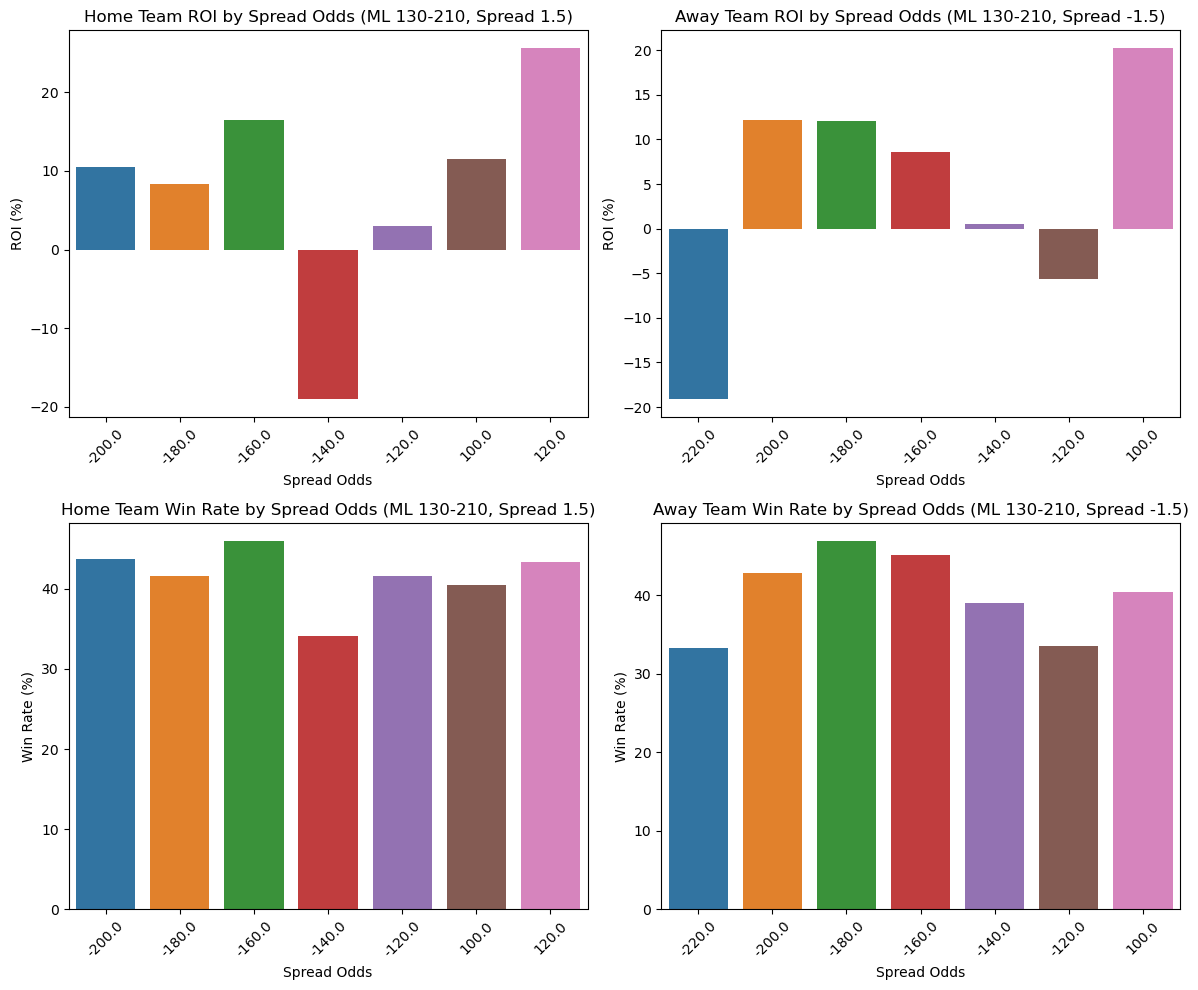


--- DETAILED MONEYLINE VALUE ANALYSIS FOR 1.5 POINT SPREADS ---

Home Team Profitability by Moneyline Value:
           bets   win_rate        roi
ml_bucket                            
130.0       213  39.436620  -7.962441
140.0       133  40.601504  -1.052632
150.0       104  40.384615   2.769231
160.0        57  40.350877   6.526316
170.0        47  44.680851  22.723404
180.0        38  39.473684  12.421053
190.0        35  42.857143  26.057143
200.0        28  17.857143 -45.892857

Away Team Profitability by Moneyline Value:
           bets   win_rate        roi
ml_bucket                            
130.0       358  46.089385   7.910615
140.0       231  43.722944   6.173160
150.0       189  41.269841   4.190476
160.0       176  42.613636  12.784091
170.0        76  38.157895   4.736842
180.0       107  32.710280  -7.383178
190.0        73  28.767123 -15.671233
200.0        58  36.206897   9.741379
210.0        19  21.052632 -34.736842


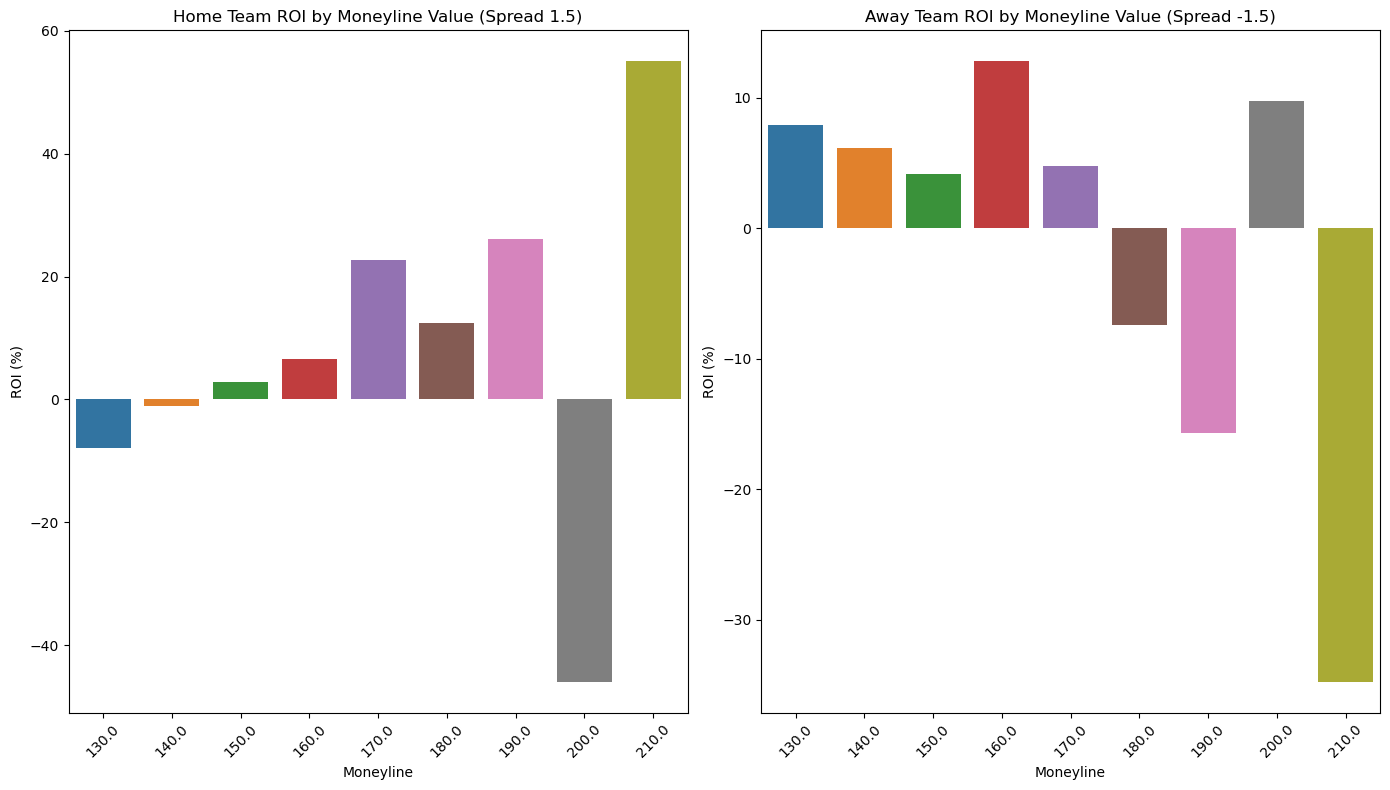


--- SUMMARY OF FINDINGS FOR 1.5 POINT SPREADS ---
1. Overall profitability of moneylines between 130-210 with 1.5 point spreads:
   - Home teams (1.5 spread): ROI = 0.49% (Sample size: 661)
   - Away teams (-1.5 spread): ROI = 4.38% (Sample size: 1287)
2. Most profitable home team spread odds (1.5 spread): 120.0 (ROI: 25.67%)
3. Most profitable away team spread odds (-1.5 spread): 100.0 (ROI: 20.26%)
4. Most profitable home team moneyline (1.5 spread): 210.0 (ROI: 55.00%)
5. Most profitable away team moneyline (-1.5 spread): 160.0 (ROI: 12.78%)

6. Key observations on relationship between moneyline profitability and 1.5 point spreads:
   - This analysis focuses exclusively on games with 1.5 point spreads
   - Smaller sample sizes may affect reliability of results
   - See detailed analysis in tables and charts above


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('Documents/MoneyLinesBetween130and210.csv')

# Function to calculate potential return on a $100 bet
def calculate_return(odds, is_win, stake=100):
    if not is_win:
        return 0
    
    if odds > 0:
        return stake + (odds/100) * stake  # Return stake + profit
    else:
        return stake + (100/abs(odds)) * stake  # Return stake + profit

# Data cleaning and preparation
df['home_win'] = df['home_score'] > df['away_score']
df['away_win'] = df['away_score'] > df['home_score']

# For home teams, we'll focus on games with a spread of 1.5
# For away teams, we'll also focus on games with a spread of 1.5
# Note: For away teams, spread is typically negative, so we'll use abs(spread) == 1.5

# Filter for moneylines between 130 and 210 with specific spread values
home_in_range = df[(df['home_money_line_odds'] >= 130) & 
                   (df['home_money_line_odds'] <= 210) & 
                   (df['spread'] == 1.5)].copy()  # Home team as favorite with 1.5 spread

away_in_range = df[(df['away_money_line_odds'] >= 130) & 
                   (df['away_money_line_odds'] <= 210) & 
                   (df['spread'] == -1.5)].copy()  # Away team as favorite with 1.5 spread

print(f"Number of home games with 1.5 point spread and moneyline 130-210: {len(home_in_range)}")
print(f"Number of away games with 1.5 point spread and moneyline 130-210: {len(away_in_range)}")

# Calculate returns for each game
home_in_range['return'] = home_in_range.apply(
    lambda row: calculate_return(row['home_money_line_odds'], row['home_win']), axis=1
)
away_in_range['return'] = away_in_range.apply(
    lambda row: calculate_return(row['away_money_line_odds'], row['away_win']), axis=1
)

home_in_range['profit'] = home_in_range['return'] - 100
away_in_range['profit'] = away_in_range['return'] - 100

# Calculate overall profitability
print("\n--- OVERALL PROFITABILITY ANALYSIS ---")
print(f"Number of home teams with moneylines 130-210: {len(home_in_range)}")
print(f"Number of away teams with moneylines 130-210: {len(away_in_range)}")

home_win_rate = home_in_range['home_win'].mean() * 100
away_win_rate = away_in_range['away_win'].mean() * 100
home_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100
away_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100

print(f"\nHome Team (ML 130-210):")
print(f"Win Rate: {home_win_rate:.2f}%")
print(f"Total Profit/Loss: ${home_in_range['profit'].sum():.2f}")
print(f"ROI: {home_roi:.2f}%")

print(f"\nAway Team (ML 130-210):")
print(f"Win Rate: {away_win_rate:.2f}%")
print(f"Total Profit/Loss: ${away_in_range['profit'].sum():.2f}")
print(f"ROI: {away_roi:.2f}%")

# Since we're focusing on 1.5 point spreads only, we'll focus on analyzing by spread odds 
# and moneyline value rather than spread value buckets
print("\n--- SPREAD ODDS VS MONEYLINE PROFITABILITY FOR 1.5 POINT SPREADS ---")

# Function to create buckets for analysis
def analyze_by_spread_odds(df, spread_odds_col, bucket_size=20):
    # Create spread odds buckets
    df['spread_bucket'] = (df[spread_odds_col] // bucket_size) * bucket_size
    
    # Group by spread bucket and calculate stats
    result = df.groupby('spread_bucket').agg(
        bets=('profit', 'count'),
        wins=('return', lambda x: (x > 0).sum()),
        profit_sum=('profit', 'sum')
    )
    
    result['win_rate'] = result['wins'] / result['bets'] * 100
    result['roi'] = result['profit_sum'] / (result['bets'] * 100) * 100
    
    # Filter out buckets with too few bets
    return result[result['bets'] >= 5].sort_index()  # Reduced minimum sample size to 5 since we're filtering

# Analyze home team spread odds for 1.5 point spreads
home_by_spread = analyze_by_spread_odds(home_in_range, 'home_spread_odds')
print("\nHome Team Profitability by Spread Odds (ML 130-210, Spread 1.5):")
print(home_by_spread[['bets', 'win_rate', 'roi']])

# Analyze away team spread odds for 1.5 point spreads
away_by_spread = analyze_by_spread_odds(away_in_range, 'away_spread_odds')
print("\nAway Team Profitability by Spread Odds (ML 130-210, Spread -1.5):")
print(away_by_spread[['bets', 'win_rate', 'roi']])

# Create visualizations
plt.figure(figsize=(12, 10))

# Home team ROI by spread odds
plt.subplot(2, 2, 1)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['roi'])
    plt.title('Home Team ROI by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team ROI (Spread 1.5)')

# Away team ROI by spread odds
plt.subplot(2, 2, 2)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['roi'])
    plt.title('Away Team ROI by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team ROI (Spread -1.5)')

# Win rate analysis
plt.subplot(2, 2, 3)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['win_rate'])
    plt.title('Home Team Win Rate by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team Win Rate (Spread 1.5)')

plt.subplot(2, 2, 4)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['win_rate'])
    plt.title('Away Team Win Rate by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team Win Rate (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_analysis_1.5point_spread.png')
plt.show()

# Since we're focusing only on specific spread values (1.5 for home, -1.5 for away),
# we'll skip the spread value bucket analysis and go directly to moneyline value analysis

# Deeper analysis by moneyline value within the range for 1.5 point spreads
print("\n--- DETAILED MONEYLINE VALUE ANALYSIS FOR 1.5 POINT SPREADS ---")

# Create moneyline value buckets
bucket_size = 10
home_in_range['ml_bucket'] = (home_in_range['home_money_line_odds'] // bucket_size) * bucket_size
away_in_range['ml_bucket'] = (away_in_range['away_money_line_odds'] // bucket_size) * bucket_size

# Group by moneyline bucket
home_by_ml = home_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

home_by_ml['win_rate'] = home_by_ml['wins'] / home_by_ml['bets'] * 100
home_by_ml['roi'] = home_by_ml['profit_sum'] / (home_by_ml['bets'] * 100) * 100

away_by_ml = away_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

away_by_ml['win_rate'] = away_by_ml['wins'] / away_by_ml['bets'] * 100
away_by_ml['roi'] = away_by_ml['profit_sum'] / (away_by_ml['bets'] * 100) * 100

print("\nHome Team Profitability by Moneyline Value:")
print(home_by_ml[home_by_ml['bets'] >= 10][['bets', 'win_rate', 'roi']].sort_index())

print("\nAway Team Profitability by Moneyline Value:")
print(away_by_ml[away_by_ml['bets'] >= 10][['bets', 'win_rate', 'roi']].sort_index())

# Plot profitability by moneyline value
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
home_ml_plot = home_by_ml[home_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not home_ml_plot.empty:
    sns.barplot(x=home_ml_plot.index, y=home_ml_plot['roi'])
    plt.title('Home Team ROI by Moneyline Value (Spread 1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Home Team ROI by Moneyline (Spread 1.5)')

plt.subplot(1, 2, 2)
away_ml_plot = away_by_ml[away_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not away_ml_plot.empty:
    sns.barplot(x=away_ml_plot.index, y=away_ml_plot['roi'])
    plt.title('Away Team ROI by Moneyline Value (Spread -1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Away Team ROI by Moneyline (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_value_analysis.png')
plt.show()

# Final summary
print("\n--- SUMMARY OF FINDINGS FOR 1.5 POINT SPREADS ---")
print("1. Overall profitability of moneylines between 130-210 with 1.5 point spreads:")
home_overall_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100 if len(home_in_range) > 0 else 0
away_overall_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100 if len(away_in_range) > 0 else 0
print(f"   - Home teams (1.5 spread): ROI = {home_overall_roi:.2f}% (Sample size: {len(home_in_range)})")
print(f"   - Away teams (-1.5 spread): ROI = {away_overall_roi:.2f}% (Sample size: {len(away_in_range)})")

# Find most profitable spread odds buckets
if len(home_by_spread) > 0:
    best_home_spread = home_by_spread['roi'].idxmax()
    print(f"2. Most profitable home team spread odds (1.5 spread): {best_home_spread} (ROI: {home_by_spread.loc[best_home_spread, 'roi']:.2f}%)")
if len(away_by_spread) > 0:
    best_away_spread = away_by_spread['roi'].idxmax()
    print(f"3. Most profitable away team spread odds (-1.5 spread): {best_away_spread} (ROI: {away_by_spread.loc[best_away_spread, 'roi']:.2f}%)")

# Find most profitable moneyline buckets
min_bets = 5  # Reduced threshold due to filtering
if len(home_by_ml[home_by_ml['bets'] >= min_bets]) > 0:
    best_home_ml = home_by_ml[home_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"4. Most profitable home team moneyline (1.5 spread): {best_home_ml} (ROI: {home_by_ml.loc[best_home_ml, 'roi']:.2f}%)")
if len(away_by_ml[away_by_ml['bets'] >= min_bets]) > 0:
    best_away_ml = away_by_ml[away_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"5. Most profitable away team moneyline (-1.5 spread): {best_away_ml} (ROI: {away_by_ml.loc[best_away_ml, 'roi']:.2f}%)")

print("\n6. Key observations on relationship between moneyline profitability and 1.5 point spreads:")
print("   - This analysis focuses exclusively on games with 1.5 point spreads")
print("   - Smaller sample sizes may affect reliability of results")
print("   - See detailed analysis in tables and charts above")

In [11]:
# Add a new figure for ratio analysis
plt.figure(figsize=(20, 16))

# Calculate ratio of moneyline to spread odds
if len(home_in_range) > 0:
    # For home teams, use absolute value of spread odds since they're typically negative
    home_in_range['ml_spread_ratio'] = home_in_range['home_money_line_odds'] / abs(home_in_range['home_spread_odds'])
    
    # Handle potential division by zero or infinite values
    home_in_range = home_in_range[~home_in_range['ml_spread_ratio'].isna() & ~np.isinf(home_in_range['ml_spread_ratio'])]

if len(away_in_range) > 0:
    # For away teams, use absolute value of spread odds since they're typically negative
    away_in_range['ml_spread_ratio'] = away_in_range['away_money_line_odds'] / abs(away_in_range['away_spread_odds'])
    
    # Handle potential division by zero or infinite values
    away_in_range = away_in_range[~away_in_range['ml_spread_ratio'].isna() & ~np.isinf(away_in_range['ml_spread_ratio'])]

# 1. Scatter plot of Ratio vs. Moneyline for home teams
plt.subplot(2, 2, 1)
if len(home_in_range) > 0:
    sns.scatterplot(
        x='home_money_line_odds',
        y='ml_spread_ratio',
        hue='home_win',
        palette={True: 'green', False: 'red'},
        s=100,
        alpha=0.7,
        data=home_in_range
    )
    plt.title('Home Team: Moneyline vs. ML/Spread Ratio (Spread 1.5)', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Moneyline/Spread Odds Ratio', fontsize=12)
    plt.legend(title='Won Bet', labels=['Lost', 'Won'], fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('No data for Home Team (Spread 1.5)')

# 2. Scatter plot of Ratio vs. Moneyline for away teams
plt.subplot(2, 2, 2)
if len(away_in_range) > 0:
    sns.scatterplot(
        x='away_money_line_odds',
        y='ml_spread_ratio',
        hue='away_win',
        palette={True: 'green', False: 'red'},
        s=100,
        alpha=0.7,
        data=away_in_range
    )
    plt.title('Away Team: Moneyline vs. ML/Spread Ratio (Spread -1.5)', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Moneyline/Spread Odds Ratio', fontsize=12)
    plt.legend(title='Won Bet', labels=['Lost', 'Won'], fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('No data for Away Team (Spread -1.5)')

# 3. Win rate by ratio for home teams (binned)
plt.subplot(2, 2, 3)
if len(home_in_range) > 0:
    # Create bins for the ratio
    ratio_bins = pd.cut(home_in_range['ml_spread_ratio'], bins=10)
    
    # Group by bins and calculate win rate
    home_ratio_analysis = home_in_range.groupby(ratio_bins)['home_win'].agg(['mean', 'count'])
    home_ratio_analysis['win_rate'] = home_ratio_analysis['mean'] * 100
    
    # Filter bins with enough samples
    home_ratio_plot = home_ratio_analysis[home_ratio_analysis['count'] >= 5]
    
    if not home_ratio_plot.empty:
        # Get bin centers for x-axis
        bin_centers = [(interval.left + interval.right)/2 for interval in home_ratio_plot.index]
        
        plt.bar(bin_centers, home_ratio_plot['win_rate'], width=(bin_centers[1]-bin_centers[0])*0.8 if len(bin_centers) > 1 else 0.5)
        
        # Add labels for sample size
        for i, (_, row) in enumerate(home_ratio_plot.iterrows()):
            plt.text(bin_centers[i], row['win_rate'] + 2, f'n={int(row["count"])}', ha='center')
        
        plt.title('Home Team: Win Rate by ML/Spread Ratio (Spread 1.5)', fontsize=14)
        plt.xlabel('Moneyline/Spread Odds Ratio', fontsize=12)
        plt.ylabel('Win Rate (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        plt.title('Insufficient data for Home Team Win Rate by ratio bin (Spread 1.5)')
else:
    plt.title('No data for Home Team (Spread 1.5)')

# 4. Win rate by ratio for away teams (binned)
plt.subplot(2, 2, 4)
if len(away_in_range) > 0:
    # Create bins for the ratio
    ratio_bins = pd.cut(away_in_range['ml_spread_ratio'], bins=10)
    
    # Group by bins and calculate win rate
    away_ratio_analysis = away_in_range.groupby(ratio_bins)['away_win'].agg(['mean', 'count'])
    away_ratio_analysis['win_rate'] = away_ratio_analysis['mean'] * 100
    
    # Filter bins with enough samples
    away_ratio_plot = away_ratio_analysis[away_ratio_analysis['count'] >= 5]
    
    if not away_ratio_plot.empty:
        # Get bin centers for x-axis
        bin_centers = [(interval.left + interval.right)/2 for interval in away_ratio_plot.index]
        
        plt.bar(bin_centers, away_ratio_plot['win_rate'], width=(bin_centers[1]-bin_centers[0])*0.8 if len(bin_centers) > 1 else 0.5)
        
        # Add labels for sample size
        for i, (_, row) in enumerate(away_ratio_plot.iterrows()):
            plt.text(bin_centers[i], row['win_rate'] + 2, f'n={int(row["count"])}', ha='center')
        
        plt.title('Away Team: Win Rate by ML/Spread Ratio (Spread -1.5)', fontsize=14)
        plt.xlabel('Moneyline/Spread Odds Ratio', fontsize=12)
        plt.ylabel('Win Rate (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        plt.title('Insufficient data for Away Team Win Rate by ratio bin (Spread -1.5)')
else:
    plt.title('No data for Away Team (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_ratio_analysis.png')
plt.show()

# Additional chart: ROI by ratio bins
plt.figure(figsize=(20, 8))

# 1. ROI by ratio for home teams (binned)
plt.subplot(1, 2, 1)
if len(home_in_range) > 0:
    # Create bins for the ratio
    ratio_bins = pd.cut(home_in_range['ml_spread_ratio'], bins=10)
    
    # Group by bins and calculate ROI
    home_ratio_roi = home_in_range.groupby(ratio_bins).agg(
        bets=('profit', 'count'),
        total_profit=('profit', 'sum')
    )
    home_ratio_roi['roi'] = home_ratio_roi['total_profit'] / (home_ratio_roi['bets'] * 100) * 100
    
    # Filter bins with enough samples
    home_roi_plot = home_ratio_roi[home_ratio_roi['bets'] >= 5]
    
    if not home_roi_plot.empty:
        # Get bin centers for x-axis
        bin_centers = [(interval.left + interval.right)/2 for interval in home_roi_plot.index]
        
        bars = plt.bar(bin_centers, home_roi_plot['roi'], width=(bin_centers[1]-bin_centers[0])*0.8 if len(bin_centers) > 1 else 0.5)
        
        # Color bars by positive/negative ROI
        for i, bar in enumerate(bars):
            bar.set_color('green' if home_roi_plot['roi'].iloc[i] > 0 else 'red')
        
        # Add labels for sample size
        for i, (_, row) in enumerate(home_roi_plot.iterrows()):
            plt.text(bin_centers[i], row['roi'] + 2, f'n={int(row["bets"])}', ha='center')
        
        # Add horizontal line at 0 ROI
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        
        plt.title('Home Team: ROI by ML/Spread Ratio (Spread 1.5)', fontsize=14)
        plt.xlabel('Moneyline/Spread Odds Ratio', fontsize=12)
        plt.ylabel('ROI (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        plt.title('Insufficient data for Home Team ROI by ratio bin (Spread 1.5)')
else:
    plt.title('No data for Home Team (Spread 1.5)')

# 2. ROI by ratio for away teams (binned)
plt.subplot(1, 2, 2)
if len(away_in_range) > 0:
    # Create bins for the ratio
    ratio_bins = pd.cut(away_in_range['ml_spread_ratio'], bins=10)
    
    # Group by bins and calculate ROI
    away_ratio_roi = away_in_range.groupby(ratio_bins).agg(
        bets=('profit', 'count'),
        total_profit=('profit', 'sum')
    )
    away_ratio_roi['roi'] = away_ratio_roi['total_profit'] / (away_ratio_roi['bets'] * 100) * 100
    
    # Filter bins with enough samples
    away_roi_plot = away_ratio_roi[away_ratio_roi['bets'] >= 5]
    
    if not away_roi_plot.empty:
        # Get bin centers for x-axis
        bin_centers = [(interval.left + interval.right)/2 for interval in away_roi_plot.index]
        
        bars = plt.bar(bin_centers, away_roi_plot['roi'], width=(bin_centers[1]-bin_centers[0])*0.8 if len(bin_centers) > 1 else 0.5)
        
        # Color bars by positive/negative ROI
        for i, bar in enumerate(bars):
            bar.set_color('green' if away_roi_plot['roi'].iloc[i] > 0 else 'red')
        
        # Add labels for sample size
        for i, (_, row) in enumerate(away_roi_plot.iterrows()):
            plt.text(bin_centers[i], row['roi'] + 2, f'n={int(row["bets"])}', ha='center')
        
        # Add horizontal line at 0 ROI
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        
        plt.title('Away Team: ROI by ML/Spread Ratio (Spread -1.5)', fontsize=14)
        plt.xlabel('Moneyline/Spread Odds Ratio', fontsize=12)
        plt.ylabel('ROI (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        plt.title('Insufficient data for Away Team ROI by ratio bin (Spread -1.5)')
else:
    plt.title('No data for Away Team (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_ratio_roi_analysis.png')
plt.show()

# Add analysis in the summary section
print("\n--- ADDITIONAL RATIO ANALYSIS ---")
print("Analysis of moneyline/spread odds ratio:")

# Find most profitable ratio bins for home teams
if len(home_in_range) > 0 and 'home_ratio_roi' in locals() and not home_ratio_roi.empty:
    home_ratio_roi_filtered = home_ratio_roi[home_ratio_roi['bets'] >= 10]  # Higher threshold for reliability
    if not home_ratio_roi_filtered.empty:
        best_home_ratio = home_ratio_roi_filtered['roi'].idxmax()
        print(f"Best Home Team ML/Spread Ratio: {best_home_ratio} (ROI: {home_ratio_roi_filtered.loc[best_home_ratio, 'roi']:.2f}%, Bets: {int(home_ratio_roi_filtered.loc[best_home_ratio, 'bets'])})")
    else:
        print("Insufficient data for reliable home team ratio analysis")
else:
    print("No data for home team ratio analysis")

# Find most profitable ratio bins for away teams
if len(away_in_range) > 0 and 'away_ratio_roi' in locals() and not away_ratio_roi.empty:
    away_ratio_roi_filtered = away_ratio_roi[away_ratio_roi['bets'] >= 10]  # Higher threshold for reliability
    if not away_ratio_roi_filtered.empty:
        best_away_ratio = away_ratio_roi_filtered['roi'].idxmax()
        print(f"Best Away Team ML/Spread Ratio: {best_away_ratio} (ROI: {away_ratio_roi_filtered.loc[best_away_ratio, 'roi']:.2f}%, Bets: {int(away_ratio_roi_filtered.loc[best_away_ratio, 'bets'])})")
    else:
        print("Insufficient data for reliable away team ratio analysis")
else:
    print("No data for away team ratio analysis")import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('MoneyLinesBetween130and210.csv')

# Function to calculate potential return on a $100 bet
def calculate_return(odds, is_win, stake=100):
    if not is_win:
        return 0
    
    if odds > 0:
        return stake + (odds/100) * stake  # Return stake + profit
    else:
        return stake + (100/abs(odds)) * stake  # Return stake + profit

# Data cleaning and preparation
df['home_win'] = df['home_score'] > df['away_score']
df['away_win'] = df['away_score'] > df['home_score']

# For home teams, we'll focus on games with a spread of 1.5
# For away teams, we'll also focus on games with a spread of 1.5
# Note: For away teams, spread is typically negative, so we'll use abs(spread) == 1.5

# Filter for moneylines between 130 and 210 with specific spread values
home_in_range = df[(df['home_money_line_odds'] >= 130) & 
                   (df['home_money_line_odds'] <= 210) & 
                   (df['spread'] == 1.5)].copy()  # Home team as favorite with 1.5 spread

away_in_range = df[(df['away_money_line_odds'] >= 130) & 
                   (df['away_money_line_odds'] <= 210) & 
                   (df['spread'] == -1.5)].copy()  # Away team as favorite with 1.5 spread

print(f"Number of home games with 1.5 point spread and moneyline 130-210: {len(home_in_range)}")
print(f"Number of away games with 1.5 point spread and moneyline 130-210: {len(away_in_range)}")

# Calculate returns for each game
home_in_range['return'] = home_in_range.apply(
    lambda row: calculate_return(row['home_money_line_odds'], row['home_win']), axis=1
)
away_in_range['return'] = away_in_range.apply(
    lambda row: calculate_return(row['away_money_line_odds'], row['away_win']), axis=1
)

home_in_range['profit'] = home_in_range['return'] - 100
away_in_range['profit'] = away_in_range['return'] - 100

# Calculate overall profitability
print("\n--- OVERALL PROFITABILITY ANALYSIS ---")
print(f"Number of home teams with moneylines 130-210: {len(home_in_range)}")
print(f"Number of away teams with moneylines 130-210: {len(away_in_range)}")

home_win_rate = home_in_range['home_win'].mean() * 100
away_win_rate = away_in_range['away_win'].mean() * 100
home_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100
away_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100

print(f"\nHome Team (ML 130-210):")
print(f"Win Rate: {home_win_rate:.2f}%")
print(f"Total Profit/Loss: ${home_in_range['profit'].sum():.2f}")
print(f"ROI: {home_roi:.2f}%")

print(f"\nAway Team (ML 130-210):")
print(f"Win Rate: {away_win_rate:.2f}%")
print(f"Total Profit/Loss: ${away_in_range['profit'].sum():.2f}")
print(f"ROI: {away_roi:.2f}%")

# Since we're focusing on 1.5 point spreads only, we'll focus on analyzing by spread odds 
# and moneyline value rather than spread value buckets
print("\n--- SPREAD ODDS VS MONEYLINE PROFITABILITY FOR 1.5 POINT SPREADS ---")

# Function to create buckets for analysis
def analyze_by_spread_odds(df, spread_odds_col, bucket_size=20):
    # Create spread odds buckets
    df['spread_bucket'] = (df[spread_odds_col] // bucket_size) * bucket_size
    
    # Group by spread bucket and calculate stats
    result = df.groupby('spread_bucket').agg(
        bets=('profit', 'count'),
        wins=('return', lambda x: (x > 0).sum()),
        profit_sum=('profit', 'sum')
    )
    
    result['win_rate'] = result['wins'] / result['bets'] * 100
    result['roi'] = result['profit_sum'] / (result['bets'] * 100) * 100
    
    # Filter out buckets with too few bets
    return result[result['bets'] >= 5].sort_index()  # Reduced minimum sample size to 5 since we're filtering

# Analyze home team spread odds for 1.5 point spreads
home_by_spread = analyze_by_spread_odds(home_in_range, 'home_spread_odds')
print("\nHome Team Profitability by Spread Odds (ML 130-210, Spread 1.5):")
print(home_by_spread[['bets', 'win_rate', 'roi']])

# Analyze away team spread odds for 1.5 point spreads
away_by_spread = analyze_by_spread_odds(away_in_range, 'away_spread_odds')
print("\nAway Team Profitability by Spread Odds (ML 130-210, Spread -1.5):")
print(away_by_spread[['bets', 'win_rate', 'roi']])

# Create visualizations
plt.figure(figsize=(12, 10))

# Home team ROI by spread odds
plt.subplot(2, 2, 1)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['roi'])
    plt.title('Home Team ROI by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team ROI (Spread 1.5)')

# Away team ROI by spread odds
plt.subplot(2, 2, 2)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['roi'])
    plt.title('Away Team ROI by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team ROI (Spread -1.5)')

# Win rate analysis
plt.subplot(2, 2, 3)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['win_rate'])
    plt.title('Home Team Win Rate by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team Win Rate (Spread 1.5)')

plt.subplot(2, 2, 4)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['win_rate'])
    plt.title('Away Team Win Rate by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team Win Rate (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_analysis_1.5point_spread.png')
plt.show()

# Since we're focusing only on specific spread values (1.5 for home, -1.5 for away),
# we'll skip the spread value bucket analysis and go directly to moneyline value analysis

# Deeper analysis by moneyline value within the range for 1.5 point spreads
print("\n--- DETAILED MONEYLINE VALUE ANALYSIS FOR 1.5 POINT SPREADS ---")

# Create moneyline value buckets
bucket_size = 10
home_in_range['ml_bucket'] = (home_in_range['home_money_line_odds'] // bucket_size) * bucket_size
away_in_range['ml_bucket'] = (away_in_range['away_money_line_odds'] // bucket_size) * bucket_size

# Group by moneyline bucket
home_by_ml = home_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

home_by_ml['win_rate'] = home_by_ml['wins'] / home_by_ml['bets'] * 100
home_by_ml['roi'] = home_by_ml['profit_sum'] / (home_by_ml['bets'] * 100) * 100

away_by_ml = away_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

away_by_ml['win_rate'] = away_by_ml['wins'] / away_by_ml['bets'] * 100
away_by_ml['roi'] = away_by_ml['profit_sum'] / (away_by_ml['bets'] * 100) * 100

print("\nHome Team Profitability by Moneyline Value:")
print(home_by_ml[home_by_ml['bets'] >= 10][['bets', 'win_rate', 'roi']].sort_index())

print("\nAway Team Profitability by Moneyline Value:")
print(away_by_ml[away_by_ml['bets'] >= 10][['bets', 'win_rate', 'roi']].sort_index())

# Plot profitability by moneyline value
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
home_ml_plot = home_by_ml[home_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not home_ml_plot.empty:
    sns.barplot(x=home_ml_plot.index, y=home_ml_plot['roi'])
    plt.title('Home Team ROI by Moneyline Value (Spread 1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Home Team ROI by Moneyline (Spread 1.5)')

plt.subplot(1, 2, 2)
away_ml_plot = away_by_ml[away_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not away_ml_plot.empty:
    sns.barplot(x=away_ml_plot.index, y=away_ml_plot['roi'])
    plt.title('Away Team ROI by Moneyline Value (Spread -1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Away Team ROI by Moneyline (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_value_analysis.png')
plt.show()

# Final summary
print("\n--- SUMMARY OF FINDINGS FOR 1.5 POINT SPREADS ---")
print("1. Overall profitability of moneylines between 130-210 with 1.5 point spreads:")
home_overall_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100 if len(home_in_range) > 0 else 0
away_overall_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100 if len(away_in_range) > 0 else 0
print(f"   - Home teams (1.5 spread): ROI = {home_overall_roi:.2f}% (Sample size: {len(home_in_range)})")
print(f"   - Away teams (-1.5 spread): ROI = {away_overall_roi:.2f}% (Sample size: {len(away_in_range)})")

# Find most profitable spread odds buckets
if len(home_by_spread) > 0:
    best_home_spread = home_by_spread['roi'].idxmax()
    print(f"2. Most profitable home team spread odds (1.5 spread): {best_home_spread} (ROI: {home_by_spread.loc[best_home_spread, 'roi']:.2f}%)")
if len(away_by_spread) > 0:
    best_away_spread = away_by_spread['roi'].idxmax()
    print(f"3. Most profitable away team spread odds (-1.5 spread): {best_away_spread} (ROI: {away_by_spread.loc[best_away_spread, 'roi']:.2f}%)")

# Find most profitable moneyline buckets
min_bets = 5  # Reduced threshold due to filtering
if len(home_by_ml[home_by_ml['bets'] >= min_bets]) > 0:
    best_home_ml = home_by_ml[home_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"4. Most profitable home team moneyline (1.5 spread): {best_home_ml} (ROI: {home_by_ml.loc[best_home_ml, 'roi']:.2f}%)")
if len(away_by_ml[away_by_ml['bets'] >= min_bets]) > 0:
    best_away_ml = away_by_ml[away_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"5. Most profitable away team moneyline (-1.5 spread): {best_away_ml} (ROI: {away_by_ml.loc[best_away_ml, 'roi']:.2f}%)")

print("\n6. Key observations on relationship between moneyline profitability and 1.5 point spreads:")
print("   - This analysis focuses exclusively on games with 1.5 point spreads")
print("   - Smaller sample sizes may affect reliability of results")
print("   - See detailed analysis in tables and charts above")

SyntaxError: invalid syntax (2986209945.py, line 242)

Number of home games with 1.5 point spread and moneyline 130-210: 661
Number of away games with 1.5 point spread and moneyline 130-210: 1287

--- OVERALL PROFITABILITY ANALYSIS ---
Number of home teams with moneylines 130-210 and 1.5 spread: 661
Number of away teams with moneylines 130-210 and -1.5 spread: 1287

Home Team (ML 130-210, Spread 1.5):
Win Rate: 39.64%
Total Profit/Loss: $321.00
ROI: 0.49%

Away Team (ML 130-210, Spread -1.5):
Win Rate: 41.10%
Total Profit/Loss: $5631.00
ROI: 4.38%


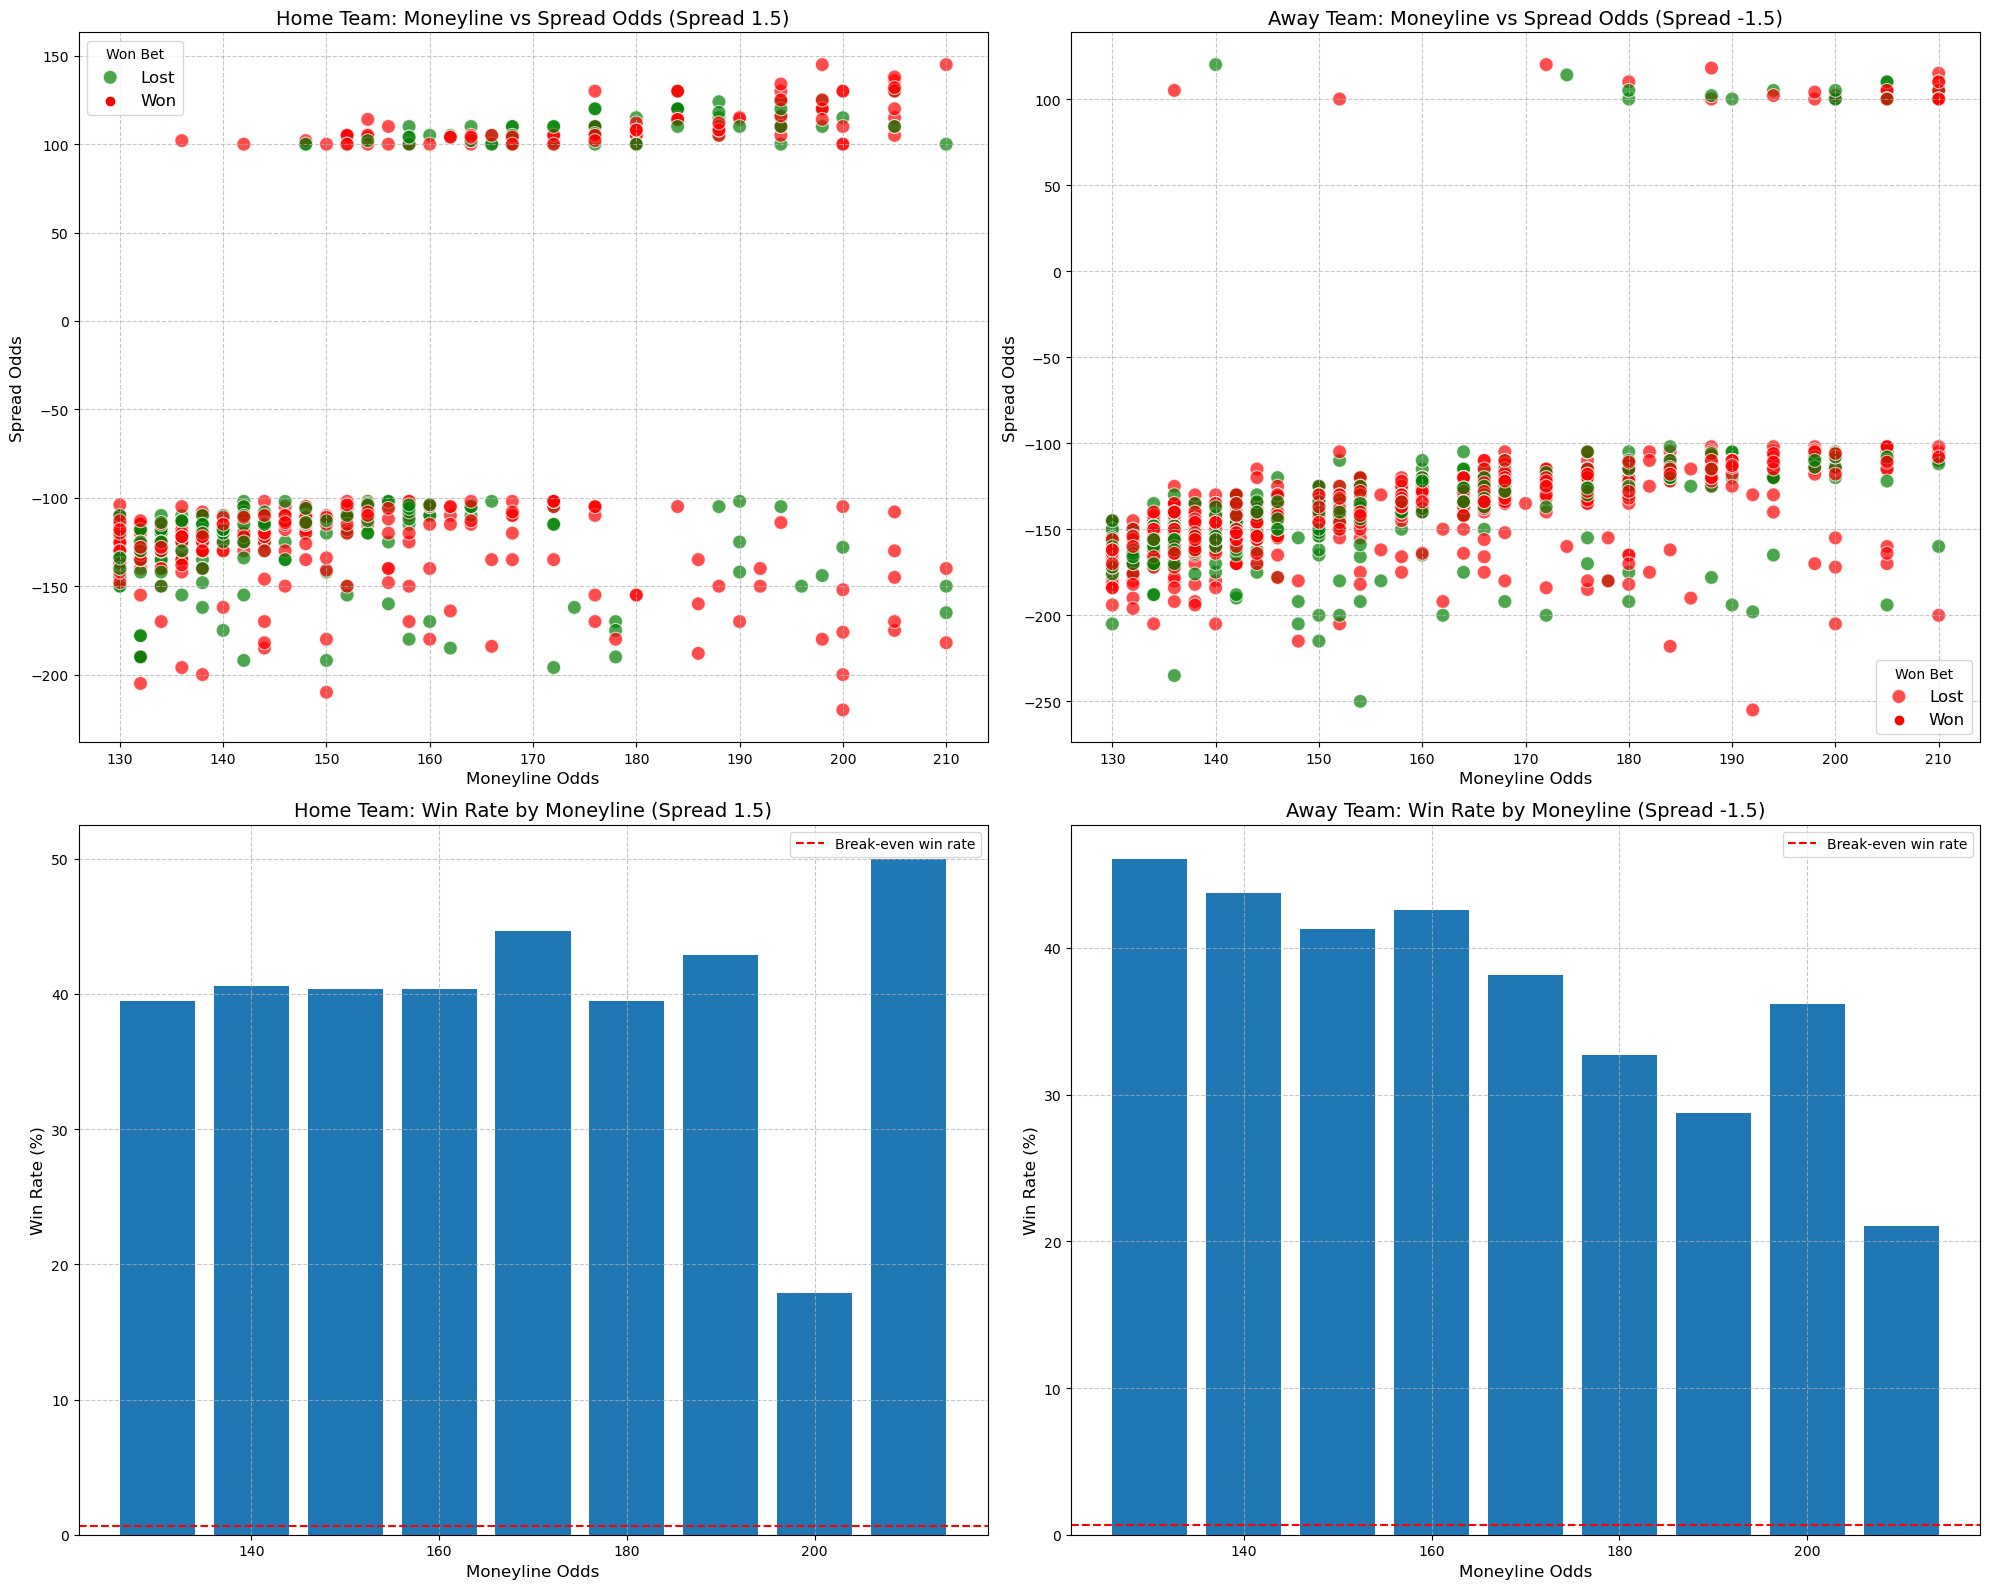

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


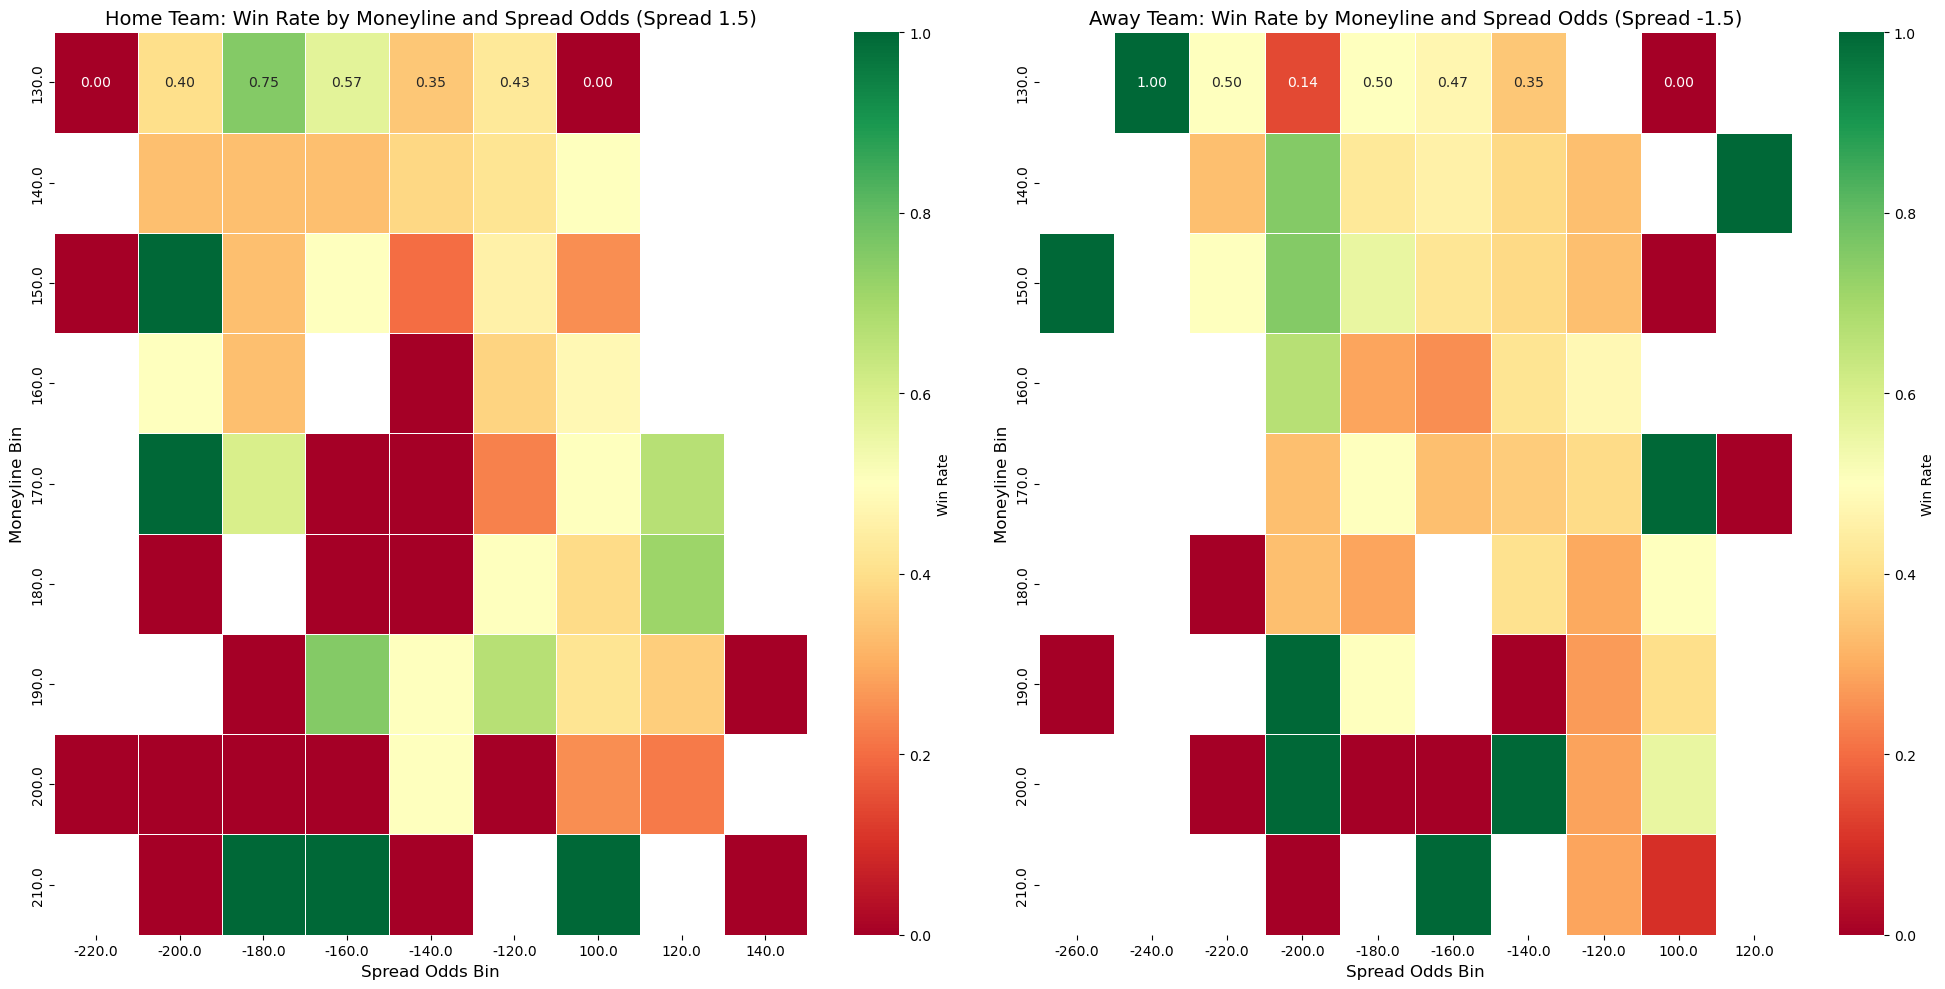


--- SPREAD ODDS VS MONEYLINE PROFITABILITY FOR 1.5 POINT SPREADS ---

Home Team Profitability by Spread Odds (ML 130-210, Spread 1.5):
               bets   win_rate        roi
spread_bucket                            
-200.0           16  43.750000  10.500000
-180.0           24  41.666667   8.333333
-160.0           37  45.945946  16.486486
-140.0          161  34.161491 -19.043478
-120.0          272  41.544118   2.955882
 100.0          116  40.517241  11.508621
 120.0           30  43.333333  25.666667

Away Team Profitability by Spread Odds (ML 130-210, Spread -1.5):
               bets   win_rate        roi
spread_bucket                            
-220.0            9  33.333333 -19.111111
-200.0           35  42.857143  12.142857
-180.0          177  46.892655  12.079096
-160.0          394  45.177665   8.634518
-140.0          372  38.978495   0.518817
-120.0          253  33.596838  -5.675889
 100.0           42  40.476190  20.261905


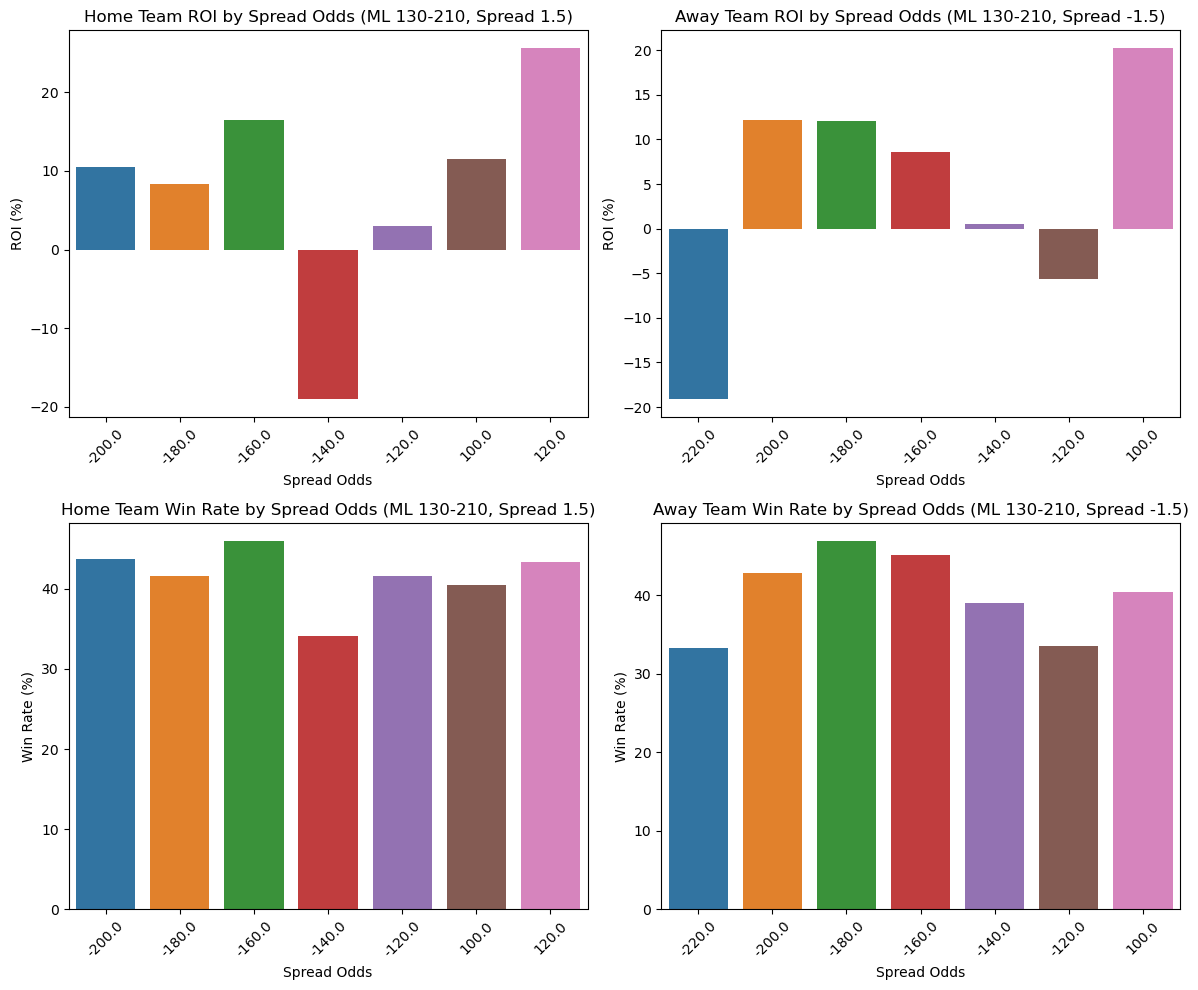


--- DETAILED MONEYLINE VALUE ANALYSIS FOR 1.5 POINT SPREADS ---

Home Team Profitability by Moneyline Value:
           bets   win_rate        roi
ml_bucket                            
130.0       213  39.436620  -7.962441
140.0       133  40.601504  -1.052632
150.0       104  40.384615   2.769231
160.0        57  40.350877   6.526316
170.0        47  44.680851  22.723404
180.0        38  39.473684  12.421053
190.0        35  42.857143  26.057143
200.0        28  17.857143 -45.892857
210.0         6  50.000000  55.000000

Away Team Profitability by Moneyline Value:
           bets   win_rate        roi
ml_bucket                            
130.0       358  46.089385   7.910615
140.0       231  43.722944   6.173160
150.0       189  41.269841   4.190476
160.0       176  42.613636  12.784091
170.0        76  38.157895   4.736842
180.0       107  32.710280  -7.383178
190.0        73  28.767123 -15.671233
200.0        58  36.206897   9.741379
210.0        19  21.052632 -34.736842


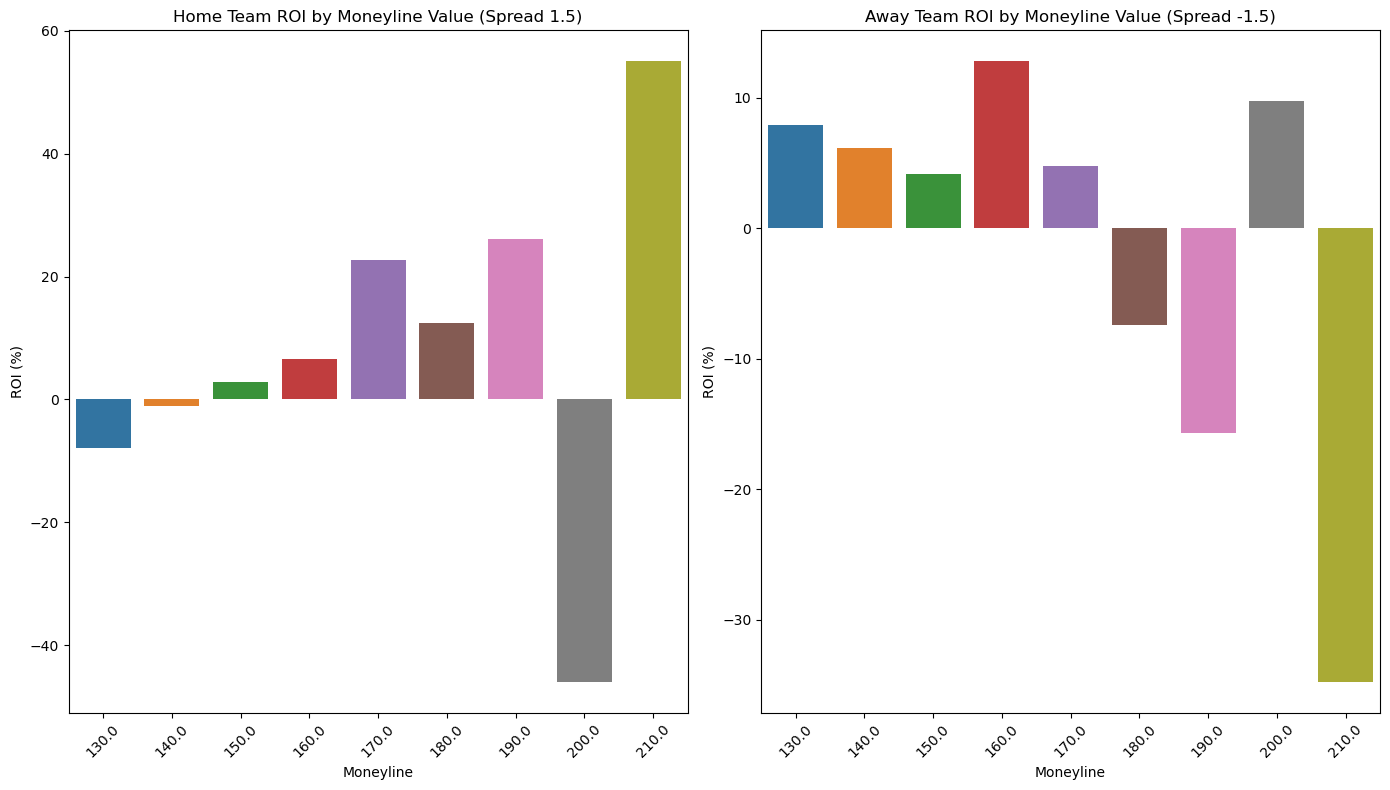

/var/folders/21/r3y1680j1xs9jgg6jhnydf3m0000gn/T/ipykernel_76690/1153158709.py:455: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  home_ratio_analysis = home_in_range.groupby(ratio_bins)['home_win'].agg(['mean', 'count'])
/var/folders/21/r3y1680j1xs9jgg6jhnydf3m0000gn/T/ipykernel_76690/1153158709.py:487: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  away_ratio_analysis = away_in_range.groupby(ratio_bins)['away_win'].agg(['mean', 'count'])


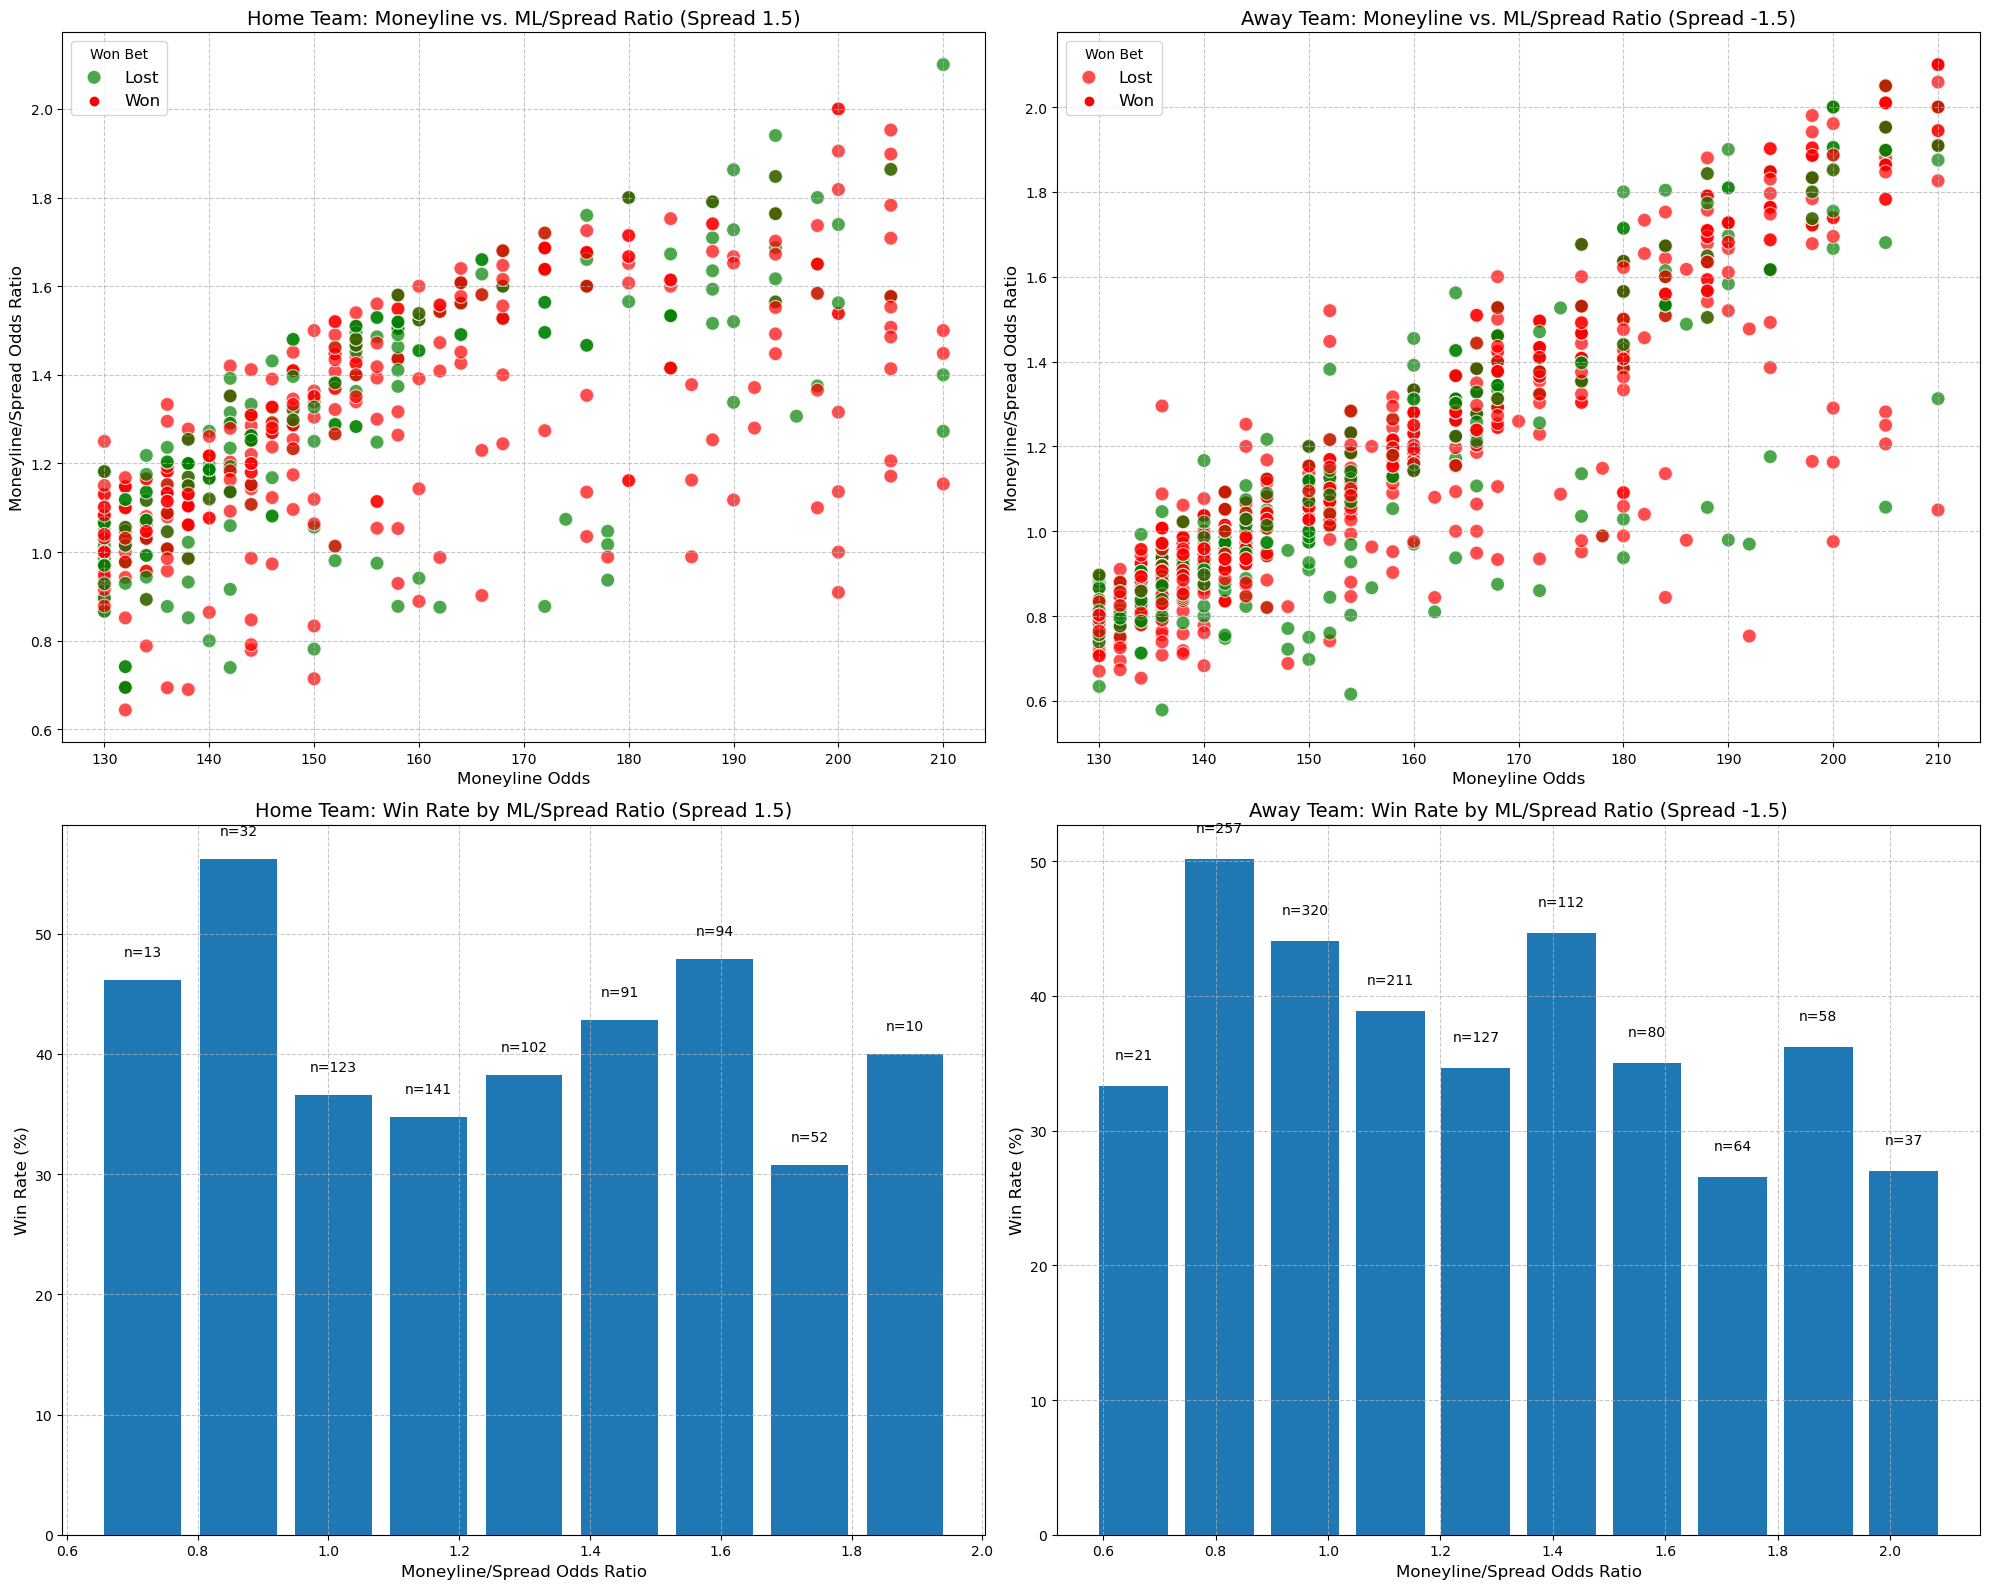

/var/folders/21/r3y1680j1xs9jgg6jhnydf3m0000gn/T/ipykernel_76690/1153158709.py:526: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  home_ratio_roi = home_in_range.groupby(ratio_bins).agg(
/var/folders/21/r3y1680j1xs9jgg6jhnydf3m0000gn/T/ipykernel_76690/1153158709.py:568: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  away_ratio_roi = away_in_range.groupby(ratio_bins).agg(


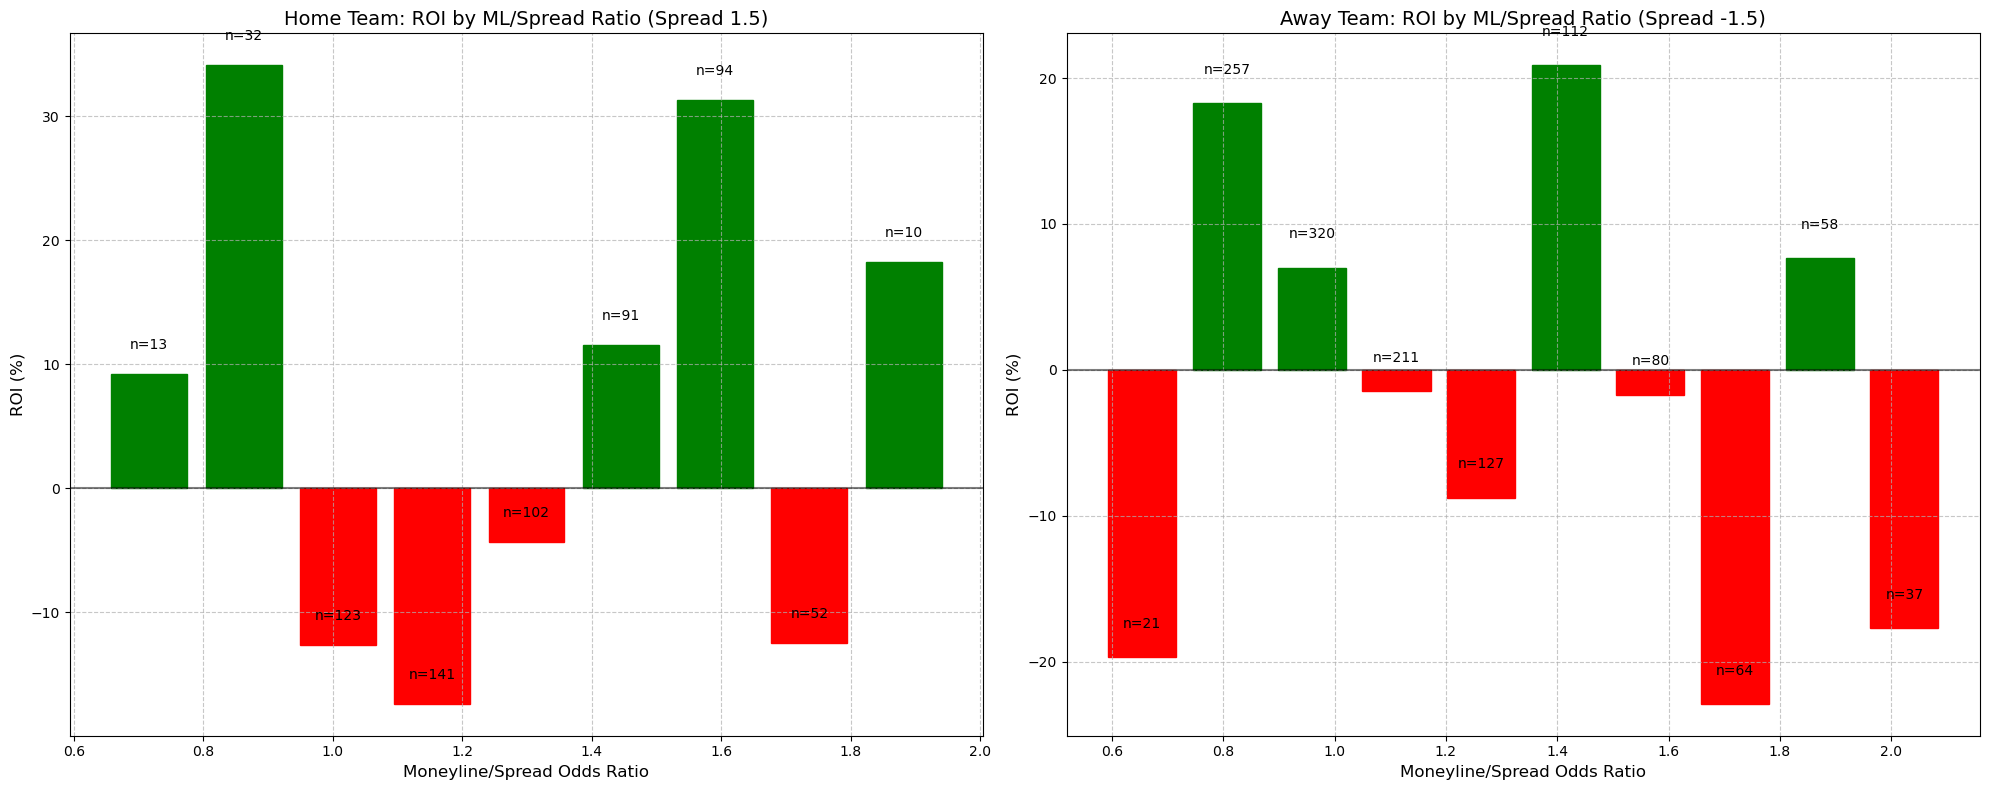


--- ADDITIONAL RATIO ANALYSIS ---
Analysis of moneyline/spread odds ratio:
Best Home Team ML/Spread Ratio: (0.79, 0.935] (ROI: 34.12%, Bets: 32)
Best Away Team ML/Spread Ratio: (1.339, 1.491] (ROI: 20.88%, Bets: 112)

--- SUMMARY OF FINDINGS FOR 1.5 POINT SPREADS ---
1. Overall profitability of moneylines between 130-210 with 1.5 point spreads:
   - Home teams (1.5 spread): ROI = 0.49% (Sample size: 661)
   - Away teams (-1.5 spread): ROI = 4.38% (Sample size: 1287)
2. Most profitable home team spread odds (1.5 spread): 120.0 (ROI: 25.67%)
3. Most profitable away team spread odds (-1.5 spread): 100.0 (ROI: 20.26%)
4. Most profitable home team moneyline (1.5 spread): 210.0 (ROI: 55.00%)
5. Most profitable away team moneyline (-1.5 spread): 160.0 (ROI: 12.78%)

6. Key observations on relationship between moneyline profitability and 1.5 point spreads:
   - This analysis focuses exclusively on games with 1.5 point spreads
   - Smaller sample sizes may affect reliability of results
   - Se

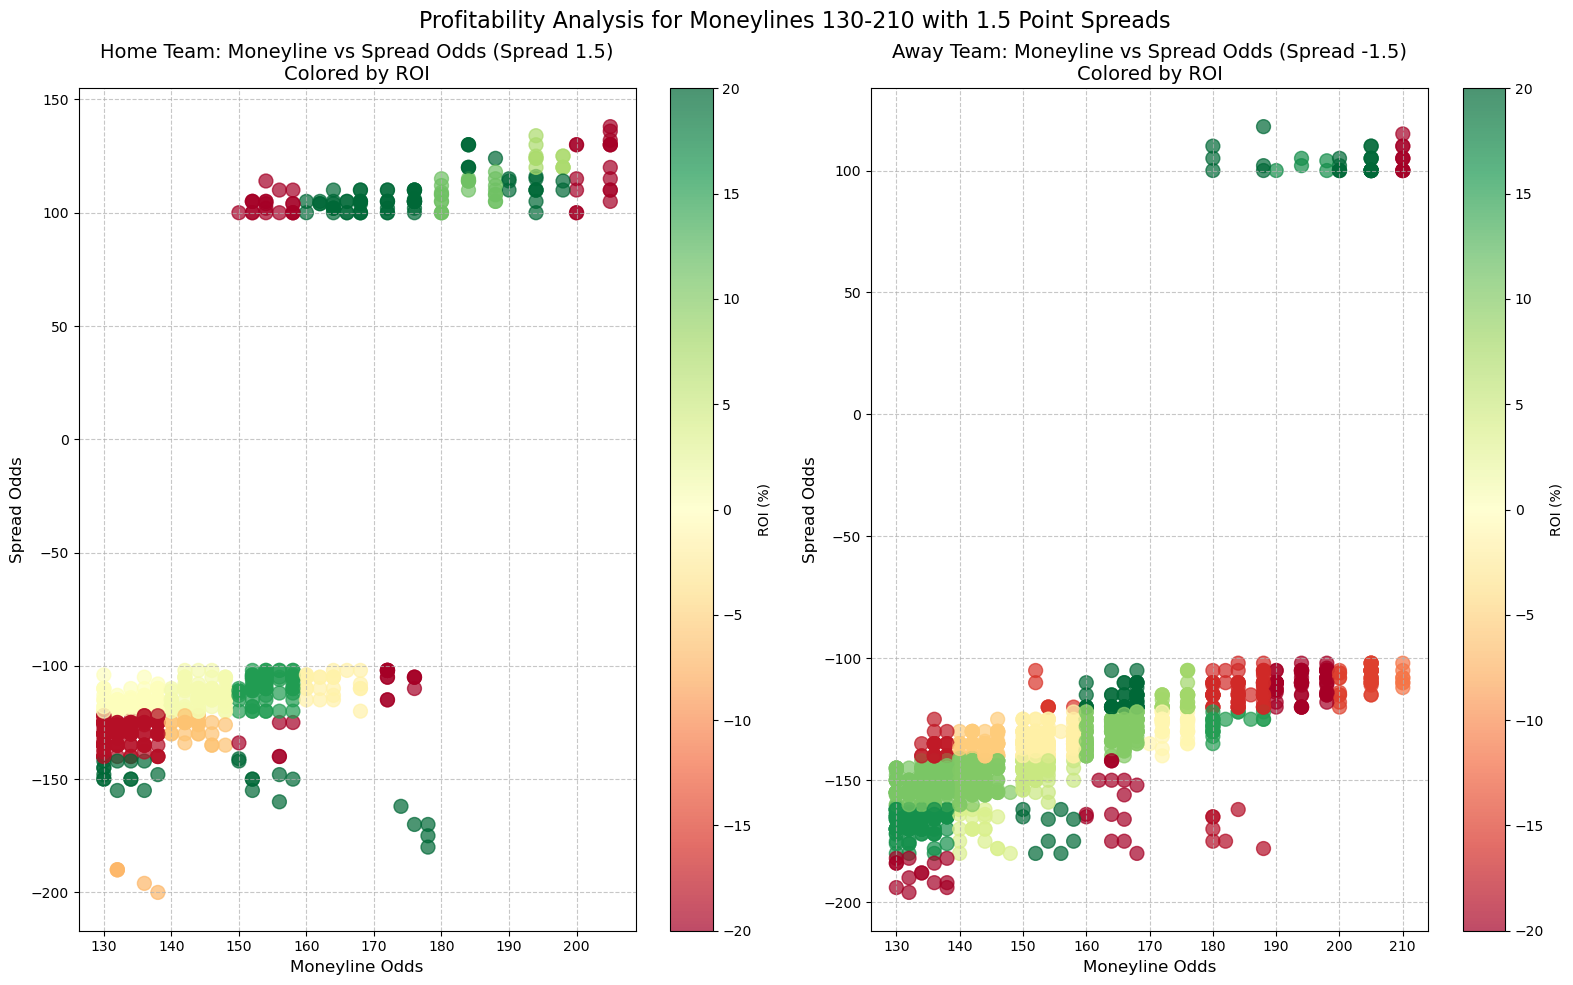


--- TOP PROFITABLE COMBINATIONS FOR HOME TEAMS (1.5 SPREAD) ---
    ml_bin  spread_odds_bin  bets   win_rate         roi
37   180.0            120.0     7  71.428571  103.428571
26   170.0           -180.0     5  60.000000   66.000000
30   170.0            100.0    22  50.000000   37.272727
3    130.0           -160.0    14  57.142857   33.142857
24   160.0            100.0    25  48.000000   27.520000
16   150.0           -160.0     8  50.000000   26.250000
42   190.0            100.0    12  41.666667   22.500000
18   150.0           -120.0    66  45.454545   15.575758
36   180.0            100.0    23  39.130435   11.304348
43   190.0            120.0    11  36.363636    7.636364

--- TOP PROFITABLE COMBINATIONS FOR AWAY TEAMS (-1.5 SPREAD) ---
    ml_bin  spread_odds_bin  bets   win_rate        roi
52   200.0            100.0    18  55.555556  68.611111
39   180.0            100.0     6  50.000000  41.333333
17   150.0           -180.0     9  55.555556  40.222222
26   160.0        

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('Documents/MoneyLinesBetween130and210.csv')

# Function to calculate potential return on a $100 bet
def calculate_return(odds, is_win, stake=100):
    if not is_win:
        return 0
    
    if odds > 0:
        return stake + (odds/100) * stake  # Return stake + profit
    else:
        return stake + (100/abs(odds)) * stake  # Return stake + profit

# Data cleaning and preparation
df['home_win'] = df['home_score'] > df['away_score']
df['away_win'] = df['away_score'] > df['home_score']

# For home teams, we'll focus on games with a spread of 1.5
# For away teams, we'll also focus on games with a spread of 1.5
# Note: For away teams, spread is typically negative, so we'll use abs(spread) == 1.5

# Filter for moneylines between 130 and 210 with specific spread values
home_in_range = df[(df['home_money_line_odds'] >= 130) & 
                   (df['home_money_line_odds'] <= 210) & 
                   (df['spread'] == 1.5)].copy()  # Home team as favorite with 1.5 spread

away_in_range = df[(df['away_money_line_odds'] >= 130) & 
                   (df['away_money_line_odds'] <= 210) & 
                   (df['spread'] == -1.5)].copy()  # Away team as favorite with 1.5 spread

print(f"Number of home games with 1.5 point spread and moneyline 130-210: {len(home_in_range)}")
print(f"Number of away games with 1.5 point spread and moneyline 130-210: {len(away_in_range)}")

# Calculate returns for each game
home_in_range['return'] = home_in_range.apply(
    lambda row: calculate_return(row['home_money_line_odds'], row['home_win']), axis=1
)
away_in_range['return'] = away_in_range.apply(
    lambda row: calculate_return(row['away_money_line_odds'], row['away_win']), axis=1
)

home_in_range['profit'] = home_in_range['return'] - 100
away_in_range['profit'] = away_in_range['return'] - 100

# Calculate overall profitability
print("\n--- OVERALL PROFITABILITY ANALYSIS ---")
print(f"Number of home teams with moneylines 130-210 and 1.5 spread: {len(home_in_range)}")
print(f"Number of away teams with moneylines 130-210 and -1.5 spread: {len(away_in_range)}")

if len(home_in_range) > 0:
    home_win_rate = home_in_range['home_win'].mean() * 100
    home_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100
    print(f"\nHome Team (ML 130-210, Spread 1.5):")
    print(f"Win Rate: {home_win_rate:.2f}%")
    print(f"Total Profit/Loss: ${home_in_range['profit'].sum():.2f}")
    print(f"ROI: {home_roi:.2f}%")

if len(away_in_range) > 0:
    away_win_rate = away_in_range['away_win'].mean() * 100
    away_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100
    print(f"\nAway Team (ML 130-210, Spread -1.5):")
    print(f"Win Rate: {away_win_rate:.2f}%")
    print(f"Total Profit/Loss: ${away_in_range['profit'].sum():.2f}")
    print(f"ROI: {away_roi:.2f}%")

# Create scatter plots to visualize individual games
plt.figure(figsize=(20, 16))

# 1. Home Team: Moneyline vs Spread Odds with Win/Loss coloring
plt.subplot(2, 2, 1)
if len(home_in_range) > 0:
    sns.scatterplot(
        x='home_money_line_odds', 
        y='home_spread_odds',
        hue='home_win',
        palette={True: 'green', False: 'red'},
        s=100,  # Larger point size
        alpha=0.7,  # Some transparency
        data=home_in_range
    )
    plt.title('Home Team: Moneyline vs Spread Odds (Spread 1.5)', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Spread Odds', fontsize=12)
    plt.legend(title='Won Bet', labels=['Lost', 'Won'], fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('No data for Home Team (Spread 1.5)')

# 2. Away Team: Moneyline vs Spread Odds with Win/Loss coloring
plt.subplot(2, 2, 2)
if len(away_in_range) > 0:
    sns.scatterplot(
        x='away_money_line_odds', 
        y='away_spread_odds',
        hue='away_win',
        palette={True: 'green', False: 'red'},
        s=100,  # Larger point size
        alpha=0.7,  # Some transparency
        data=away_in_range
    )
    plt.title('Away Team: Moneyline vs Spread Odds (Spread -1.5)', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Spread Odds', fontsize=12)
    plt.legend(title='Won Bet', labels=['Lost', 'Won'], fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('No data for Away Team (Spread -1.5)')

# 3. Home Team: Win rate by Moneyline (binned)
plt.subplot(2, 2, 3)
if len(home_in_range) > 0:
    # Create bins for moneyline odds
    bin_size = 10
    home_in_range['ml_bin'] = (home_in_range['home_money_line_odds'] // bin_size) * bin_size
    
    # Group by bins and calculate win rate
    home_bins = home_in_range.groupby('ml_bin')['home_win'].agg(['mean', 'count'])
    home_bins['win_rate'] = home_bins['mean'] * 100
    
    # Filter bins with enough samples
    home_bins_plot = home_bins[home_bins['count'] >= 5]
    
    if not home_bins_plot.empty:
        plt.bar(home_bins_plot.index, home_bins_plot['win_rate'], width=bin_size*0.8)
        plt.axhline(y=100/np.mean(home_in_range['home_money_line_odds']), color='r', linestyle='--', 
                   label='Break-even win rate')
        
        plt.title('Home Team: Win Rate by Moneyline (Spread 1.5)', fontsize=14)
        plt.xlabel('Moneyline Odds', fontsize=12)
        plt.ylabel('Win Rate (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
    else:
        plt.title('Insufficient data for Home Team Win Rate by bin (Spread 1.5)')
else:
    plt.title('No data for Home Team (Spread 1.5)')

# 4. Away Team: Win rate by Moneyline (binned)
plt.subplot(2, 2, 4)
if len(away_in_range) > 0:
    # Create bins for moneyline odds
    bin_size = 10
    away_in_range['ml_bin'] = (away_in_range['away_money_line_odds'] // bin_size) * bin_size
    
    # Group by bins and calculate win rate
    away_bins = away_in_range.groupby('ml_bin')['away_win'].agg(['mean', 'count'])
    away_bins['win_rate'] = away_bins['mean'] * 100
    
    # Filter bins with enough samples
    away_bins_plot = away_bins[away_bins['count'] >= 5]
    
    if not away_bins_plot.empty:
        plt.bar(away_bins_plot.index, away_bins_plot['win_rate'], width=bin_size*0.8)
        plt.axhline(y=100/np.mean(away_in_range['away_money_line_odds']), color='r', linestyle='--', 
                   label='Break-even win rate')
        
        plt.title('Away Team: Win Rate by Moneyline (Spread -1.5)', fontsize=14)
        plt.xlabel('Moneyline Odds', fontsize=12)
        plt.ylabel('Win Rate (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
    else:
        plt.title('Insufficient data for Away Team Win Rate by bin (Spread -1.5)')
else:
    plt.title('No data for Away Team (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_scatter_analysis.png')
plt.show()

# Create more detailed visualization for spread odds influence
plt.figure(figsize=(20, 10))

# 1. Home Team: Win rate heatmap by Moneyline and Spread Odds
plt.subplot(1, 2, 1)
if len(home_in_range) > 0:
    # Create bins for both moneyline and spread odds
    ml_bin_size = 10
    spread_odds_bin_size = 20
    
    home_in_range['ml_bin'] = (home_in_range['home_money_line_odds'] // ml_bin_size) * ml_bin_size
    home_in_range['spread_odds_bin'] = (home_in_range['home_spread_odds'] // spread_odds_bin_size) * spread_odds_bin_size
    
    # Create pivot table for heatmap
    home_pivot = home_in_range.pivot_table(
        values='home_win',
        index='ml_bin',
        columns='spread_odds_bin',
        aggfunc='mean'
    )
    
    # Plot heatmap
    if not home_pivot.empty:
        sns.heatmap(home_pivot, annot=True, cmap='RdYlGn', vmin=0, vmax=1, 
                   fmt='.2f', linewidths=.5, cbar_kws={'label': 'Win Rate'})
        plt.title('Home Team: Win Rate by Moneyline and Spread Odds (Spread 1.5)', fontsize=14)
        plt.xlabel('Spread Odds Bin', fontsize=12)
        plt.ylabel('Moneyline Bin', fontsize=12)
    else:
        plt.title('Insufficient data for Home Team heatmap (Spread 1.5)')
else:
    plt.title('No data for Home Team (Spread 1.5)')

# 2. Away Team: Win rate heatmap by Moneyline and Spread Odds
plt.subplot(1, 2, 2)
if len(away_in_range) > 0:
    # Create bins for both moneyline and spread odds
    ml_bin_size = 10
    spread_odds_bin_size = 20
    
    away_in_range['ml_bin'] = (away_in_range['away_money_line_odds'] // ml_bin_size) * ml_bin_size
    away_in_range['spread_odds_bin'] = (away_in_range['away_spread_odds'] // spread_odds_bin_size) * spread_odds_bin_size
    
    # Create pivot table for heatmap
    away_pivot = away_in_range.pivot_table(
        values='away_win',
        index='ml_bin',
        columns='spread_odds_bin',
        aggfunc='mean'
    )
    
    # Plot heatmap
    if not away_pivot.empty and not away_pivot.isnull().all().all():
        sns.heatmap(away_pivot, annot=True, cmap='RdYlGn', vmin=0, vmax=1, 
                   fmt='.2f', linewidths=.5, cbar_kws={'label': 'Win Rate'})
        plt.title('Away Team: Win Rate by Moneyline and Spread Odds (Spread -1.5)', fontsize=14)
        plt.xlabel('Spread Odds Bin', fontsize=12)
        plt.ylabel('Moneyline Bin', fontsize=12)
    else:
        plt.title('Insufficient data for Away Team heatmap (Spread -1.5)')
else:
    plt.title('No data for Away Team (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_heatmap_analysis.png')
plt.show()

# Since we're focusing on 1.5 point spreads only, we'll focus on analyzing by spread odds 
# and moneyline value rather than spread value buckets
print("\n--- SPREAD ODDS VS MONEYLINE PROFITABILITY FOR 1.5 POINT SPREADS ---")

# Function to create buckets for analysis
def analyze_by_spread_odds(df, spread_odds_col, bucket_size=20):
    # Create spread odds buckets
    df['spread_bucket'] = (df[spread_odds_col] // bucket_size) * bucket_size
    
    # Group by spread bucket and calculate stats
    result = df.groupby('spread_bucket').agg(
        bets=('profit', 'count'),
        wins=('return', lambda x: (x > 0).sum()),
        profit_sum=('profit', 'sum')
    )
    
    result['win_rate'] = result['wins'] / result['bets'] * 100
    result['roi'] = result['profit_sum'] / (result['bets'] * 100) * 100
    
    # Filter out buckets with too few bets
    return result[result['bets'] >= 5].sort_index()  # Reduced minimum sample size to 5 since we're filtering

# Analyze home team spread odds for 1.5 point spreads
home_by_spread = analyze_by_spread_odds(home_in_range, 'home_spread_odds')
print("\nHome Team Profitability by Spread Odds (ML 130-210, Spread 1.5):")
print(home_by_spread[['bets', 'win_rate', 'roi']])

# Analyze away team spread odds for 1.5 point spreads
away_by_spread = analyze_by_spread_odds(away_in_range, 'away_spread_odds')
print("\nAway Team Profitability by Spread Odds (ML 130-210, Spread -1.5):")
print(away_by_spread[['bets', 'win_rate', 'roi']])

# Create visualizations
plt.figure(figsize=(12, 10))

# Home team ROI by spread odds
plt.subplot(2, 2, 1)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['roi'])
    plt.title('Home Team ROI by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team ROI (Spread 1.5)')

# Away team ROI by spread odds
plt.subplot(2, 2, 2)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['roi'])
    plt.title('Away Team ROI by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team ROI (Spread -1.5)')

# Win rate analysis
plt.subplot(2, 2, 3)
if not home_by_spread.empty:
    sns.barplot(x=home_by_spread.index, y=home_by_spread['win_rate'])
    plt.title('Home Team Win Rate by Spread Odds (ML 130-210, Spread 1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Home Team Win Rate (Spread 1.5)')

plt.subplot(2, 2, 4)
if not away_by_spread.empty:
    sns.barplot(x=away_by_spread.index, y=away_by_spread['win_rate'])
    plt.title('Away Team Win Rate by Spread Odds (ML 130-210, Spread -1.5)')
    plt.xlabel('Spread Odds')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No data for Away Team Win Rate (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_analysis_1.5point_spread.png')
plt.show()

# Since we're focusing only on specific spread values (1.5 for home, -1.5 for away),
# we'll skip the spread value bucket analysis and go directly to moneyline value analysis

# Deeper analysis by moneyline value within the range for 1.5 point spreads
print("\n--- DETAILED MONEYLINE VALUE ANALYSIS FOR 1.5 POINT SPREADS ---")

# Create moneyline value buckets
bucket_size = 10
home_in_range['ml_bucket'] = (home_in_range['home_money_line_odds'] // bucket_size) * bucket_size
away_in_range['ml_bucket'] = (away_in_range['away_money_line_odds'] // bucket_size) * bucket_size

# Group by moneyline bucket
home_by_ml = home_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

home_by_ml['win_rate'] = home_by_ml['wins'] / home_by_ml['bets'] * 100
home_by_ml['roi'] = home_by_ml['profit_sum'] / (home_by_ml['bets'] * 100) * 100

away_by_ml = away_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('return', lambda x: (x > 0).sum()),
    profit_sum=('profit', 'sum')
)

away_by_ml['win_rate'] = away_by_ml['wins'] / away_by_ml['bets'] * 100
away_by_ml['roi'] = away_by_ml['profit_sum'] / (away_by_ml['bets'] * 100) * 100

print("\nHome Team Profitability by Moneyline Value:")
print(home_by_ml[home_by_ml['bets'] >= 5][['bets', 'win_rate', 'roi']].sort_index())

print("\nAway Team Profitability by Moneyline Value:")
print(away_by_ml[away_by_ml['bets'] >= 5][['bets', 'win_rate', 'roi']].sort_index())

# Plot profitability by moneyline value
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
home_ml_plot = home_by_ml[home_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not home_ml_plot.empty:
    sns.barplot(x=home_ml_plot.index, y=home_ml_plot['roi'])
    plt.title('Home Team ROI by Moneyline Value (Spread 1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Home Team ROI by Moneyline (Spread 1.5)')

plt.subplot(1, 2, 2)
away_ml_plot = away_by_ml[away_by_ml['bets'] >= 5]  # Reduced minimum to 5 due to filtering
if not away_ml_plot.empty:
    sns.barplot(x=away_ml_plot.index, y=away_ml_plot['roi'])
    plt.title('Away Team ROI by Moneyline Value (Spread -1.5)')
    plt.xlabel('Moneyline')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=45)
else:
    plt.title('No sufficient data for Away Team ROI by Moneyline (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_value_analysis.png')
plt.show()

# Add a new figure for ratio analysis
plt.figure(figsize=(20, 16))

# Calculate ratio of moneyline to spread odds
if len(home_in_range) > 0:
    # For home teams, use absolute value of spread odds since they're typically negative
    home_in_range['ml_spread_ratio'] = home_in_range['home_money_line_odds'] / abs(home_in_range['home_spread_odds'])
    
    # Handle potential division by zero or infinite values
    home_in_range = home_in_range[~home_in_range['ml_spread_ratio'].isna() & ~np.isinf(home_in_range['ml_spread_ratio'])]

if len(away_in_range) > 0:
    # For away teams, use absolute value of spread odds since they're typically negative
    away_in_range['ml_spread_ratio'] = away_in_range['away_money_line_odds'] / abs(away_in_range['away_spread_odds'])
    
    # Handle potential division by zero or infinite values
    away_in_range = away_in_range[~away_in_range['ml_spread_ratio'].isna() & ~np.isinf(away_in_range['ml_spread_ratio'])]

# 1. Scatter plot of Ratio vs. Moneyline for home teams
plt.subplot(2, 2, 1)
if len(home_in_range) > 0:
    sns.scatterplot(
        x='home_money_line_odds',
        y='ml_spread_ratio',
        hue='home_win',
        palette={True: 'green', False: 'red'},
        s=100,
        alpha=0.7,
        data=home_in_range
    )
    plt.title('Home Team: Moneyline vs. ML/Spread Ratio (Spread 1.5)', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Moneyline/Spread Odds Ratio', fontsize=12)
    plt.legend(title='Won Bet', labels=['Lost', 'Won'], fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('No data for Home Team (Spread 1.5)')

# 2. Scatter plot of Ratio vs. Moneyline for away teams
plt.subplot(2, 2, 2)
if len(away_in_range) > 0:
    sns.scatterplot(
        x='away_money_line_odds',
        y='ml_spread_ratio',
        hue='away_win',
        palette={True: 'green', False: 'red'},
        s=100,
        alpha=0.7,
        data=away_in_range
    )
    plt.title('Away Team: Moneyline vs. ML/Spread Ratio (Spread -1.5)', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Moneyline/Spread Odds Ratio', fontsize=12)
    plt.legend(title='Won Bet', labels=['Lost', 'Won'], fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('No data for Away Team (Spread -1.5)')

# 3. Win rate by ratio for home teams (binned)
plt.subplot(2, 2, 3)
if len(home_in_range) > 0:
    # Create bins for the ratio
    ratio_bins = pd.cut(home_in_range['ml_spread_ratio'], bins=10)
    
    # Group by bins and calculate win rate
    home_ratio_analysis = home_in_range.groupby(ratio_bins)['home_win'].agg(['mean', 'count'])
    home_ratio_analysis['win_rate'] = home_ratio_analysis['mean'] * 100
    
    # Filter bins with enough samples
    home_ratio_plot = home_ratio_analysis[home_ratio_analysis['count'] >= 5]
    
    if not home_ratio_plot.empty:
        # Get bin centers for x-axis
        bin_centers = [(interval.left + interval.right)/2 for interval in home_ratio_plot.index]
        
        plt.bar(bin_centers, home_ratio_plot['win_rate'], width=(bin_centers[1]-bin_centers[0])*0.8 if len(bin_centers) > 1 else 0.5)
        
        # Add labels for sample size
        for i, (_, row) in enumerate(home_ratio_plot.iterrows()):
            plt.text(bin_centers[i], row['win_rate'] + 2, f'n={int(row["count"])}', ha='center')
        
        plt.title('Home Team: Win Rate by ML/Spread Ratio (Spread 1.5)', fontsize=14)
        plt.xlabel('Moneyline/Spread Odds Ratio', fontsize=12)
        plt.ylabel('Win Rate (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        plt.title('Insufficient data for Home Team Win Rate by ratio bin (Spread 1.5)')
else:
    plt.title('No data for Home Team (Spread 1.5)')

# 4. Win rate by ratio for away teams (binned)
plt.subplot(2, 2, 4)
if len(away_in_range) > 0:
    # Create bins for the ratio
    ratio_bins = pd.cut(away_in_range['ml_spread_ratio'], bins=10)
    
    # Group by bins and calculate win rate
    away_ratio_analysis = away_in_range.groupby(ratio_bins)['away_win'].agg(['mean', 'count'])
    away_ratio_analysis['win_rate'] = away_ratio_analysis['mean'] * 100
    
    # Filter bins with enough samples
    away_ratio_plot = away_ratio_analysis[away_ratio_analysis['count'] >= 5]
    
    if not away_ratio_plot.empty:
        # Get bin centers for x-axis
        bin_centers = [(interval.left + interval.right)/2 for interval in away_ratio_plot.index]
        
        plt.bar(bin_centers, away_ratio_plot['win_rate'], width=(bin_centers[1]-bin_centers[0])*0.8 if len(bin_centers) > 1 else 0.5)
        
        # Add labels for sample size
        for i, (_, row) in enumerate(away_ratio_plot.iterrows()):
            plt.text(bin_centers[i], row['win_rate'] + 2, f'n={int(row["count"])}', ha='center')
        
        plt.title('Away Team: Win Rate by ML/Spread Ratio (Spread -1.5)', fontsize=14)
        plt.xlabel('Moneyline/Spread Odds Ratio', fontsize=12)
        plt.ylabel('Win Rate (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        plt.title('Insufficient data for Away Team Win Rate by ratio bin (Spread -1.5)')
else:
    plt.title('No data for Away Team (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_ratio_analysis.png')
plt.show()

# Additional chart: ROI by ratio bins
plt.figure(figsize=(20, 8))

# 1. ROI by ratio for home teams (binned)
plt.subplot(1, 2, 1)
if len(home_in_range) > 0:
    # Create bins for the ratio
    ratio_bins = pd.cut(home_in_range['ml_spread_ratio'], bins=10)
    
    # Group by bins and calculate ROI
    home_ratio_roi = home_in_range.groupby(ratio_bins).agg(
        bets=('profit', 'count'),
        total_profit=('profit', 'sum')
    )
    home_ratio_roi['roi'] = home_ratio_roi['total_profit'] / (home_ratio_roi['bets'] * 100) * 100
    
    # Filter bins with enough samples
    home_roi_plot = home_ratio_roi[home_ratio_roi['bets'] >= 5]
    
    if not home_roi_plot.empty:
        # Get bin centers for x-axis
        bin_centers = [(interval.left + interval.right)/2 for interval in home_roi_plot.index]
        
        bars = plt.bar(bin_centers, home_roi_plot['roi'], width=(bin_centers[1]-bin_centers[0])*0.8 if len(bin_centers) > 1 else 0.5)
        
        # Color bars by positive/negative ROI
        for i, bar in enumerate(bars):
            bar.set_color('green' if home_roi_plot['roi'].iloc[i] > 0 else 'red')
        
        # Add labels for sample size
        for i, (_, row) in enumerate(home_roi_plot.iterrows()):
            plt.text(bin_centers[i], row['roi'] + 2, f'n={int(row["bets"])}', ha='center')
        
        # Add horizontal line at 0 ROI
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        
        plt.title('Home Team: ROI by ML/Spread Ratio (Spread 1.5)', fontsize=14)
        plt.xlabel('Moneyline/Spread Odds Ratio', fontsize=12)
        plt.ylabel('ROI (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        plt.title('Insufficient data for Home Team ROI by ratio bin (Spread 1.5)')
else:
    plt.title('No data for Home Team (Spread 1.5)')

# 2. ROI by ratio for away teams (binned)
plt.subplot(1, 2, 2)
if len(away_in_range) > 0:
    # Create bins for the ratio
    ratio_bins = pd.cut(away_in_range['ml_spread_ratio'], bins=10)
    
    # Group by bins and calculate ROI
    away_ratio_roi = away_in_range.groupby(ratio_bins).agg(
        bets=('profit', 'count'),
        total_profit=('profit', 'sum')
    )
    away_ratio_roi['roi'] = away_ratio_roi['total_profit'] / (away_ratio_roi['bets'] * 100) * 100
    
    # Filter bins with enough samples
    away_roi_plot = away_ratio_roi[away_ratio_roi['bets'] >= 5]
    
    if not away_roi_plot.empty:
        # Get bin centers for x-axis
        bin_centers = [(interval.left + interval.right)/2 for interval in away_roi_plot.index]
        
        bars = plt.bar(bin_centers, away_roi_plot['roi'], width=(bin_centers[1]-bin_centers[0])*0.8 if len(bin_centers) > 1 else 0.5)
        
        # Color bars by positive/negative ROI
        for i, bar in enumerate(bars):
            bar.set_color('green' if away_roi_plot['roi'].iloc[i] > 0 else 'red')
        
        # Add labels for sample size
        for i, (_, row) in enumerate(away_roi_plot.iterrows()):
            plt.text(bin_centers[i], row['roi'] + 2, f'n={int(row["bets"])}', ha='center')
        
        # Add horizontal line at 0 ROI
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        
        plt.title('Away Team: ROI by ML/Spread Ratio (Spread -1.5)', fontsize=14)
        plt.xlabel('Moneyline/Spread Odds Ratio', fontsize=12)
        plt.ylabel('ROI (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        plt.title('Insufficient data for Away Team ROI by ratio bin (Spread -1.5)')
else:
    plt.title('No data for Away Team (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_ratio_roi_analysis.png')
plt.show()

# Add analysis in the summary section
print("\n--- ADDITIONAL RATIO ANALYSIS ---")
print("Analysis of moneyline/spread odds ratio:")

# Find most profitable ratio bins for home teams
if len(home_in_range) > 0 and 'home_ratio_roi' in locals() and not home_ratio_roi.empty:
    home_ratio_roi_filtered = home_ratio_roi[home_ratio_roi['bets'] >= 10]  # Higher threshold for reliability
    if not home_ratio_roi_filtered.empty:
        best_home_ratio = home_ratio_roi_filtered['roi'].idxmax()
        print(f"Best Home Team ML/Spread Ratio: {best_home_ratio} (ROI: {home_ratio_roi_filtered.loc[best_home_ratio, 'roi']:.2f}%, Bets: {int(home_ratio_roi_filtered.loc[best_home_ratio, 'bets'])})")
    else:
        print("Insufficient data for reliable home team ratio analysis")
else:
    print("No data for home team ratio analysis")

# Find most profitable ratio bins for away teams
if len(away_in_range) > 0 and 'away_ratio_roi' in locals() and not away_ratio_roi.empty:
    away_ratio_roi_filtered = away_ratio_roi[away_ratio_roi['bets'] >= 10]  # Higher threshold for reliability
    if not away_ratio_roi_filtered.empty:
        best_away_ratio = away_ratio_roi_filtered['roi'].idxmax()
        print(f"Best Away Team ML/Spread Ratio: {best_away_ratio} (ROI: {away_ratio_roi_filtered.loc[best_away_ratio, 'roi']:.2f}%, Bets: {int(away_ratio_roi_filtered.loc[best_away_ratio, 'bets'])})")
    else:
        print("Insufficient data for reliable away team ratio analysis")
else:
    print("No data for away team ratio analysis")

# Final summary
print("\n--- SUMMARY OF FINDINGS FOR 1.5 POINT SPREADS ---")
print("1. Overall profitability of moneylines between 130-210 with 1.5 point spreads:")
home_overall_roi = home_in_range['profit'].sum() / (len(home_in_range) * 100) * 100 if len(home_in_range) > 0 else 0
away_overall_roi = away_in_range['profit'].sum() / (len(away_in_range) * 100) * 100 if len(away_in_range) > 0 else 0
print(f"   - Home teams (1.5 spread): ROI = {home_overall_roi:.2f}% (Sample size: {len(home_in_range)})")
print(f"   - Away teams (-1.5 spread): ROI = {away_overall_roi:.2f}% (Sample size: {len(away_in_range)})")

# Find most profitable spread odds buckets
if len(home_by_spread) > 0:
    best_home_spread = home_by_spread['roi'].idxmax()
    print(f"2. Most profitable home team spread odds (1.5 spread): {best_home_spread} (ROI: {home_by_spread.loc[best_home_spread, 'roi']:.2f}%)")
if len(away_by_spread) > 0:
    best_away_spread = away_by_spread['roi'].idxmax()
    print(f"3. Most profitable away team spread odds (-1.5 spread): {best_away_spread} (ROI: {away_by_spread.loc[best_away_spread, 'roi']:.2f}%)")

# Find most profitable moneyline buckets
min_bets = 5  # Reduced threshold due to filtering
if len(home_by_ml[home_by_ml['bets'] >= min_bets]) > 0:
    best_home_ml = home_by_ml[home_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"4. Most profitable home team moneyline (1.5 spread): {best_home_ml} (ROI: {home_by_ml.loc[best_home_ml, 'roi']:.2f}%)")
if len(away_by_ml[away_by_ml['bets'] >= min_bets]) > 0:
    best_away_ml = away_by_ml[away_by_ml['bets'] >= min_bets]['roi'].idxmax()
    print(f"5. Most profitable away team moneyline (-1.5 spread): {best_away_ml} (ROI: {away_by_ml.loc[best_away_ml, 'roi']:.2f}%)")

print("\n6. Key observations on relationship between moneyline profitability and 1.5 point spreads:")
print("   - This analysis focuses exclusively on games with 1.5 point spreads")
print("   - Smaller sample sizes may affect reliability of results")
print("   - See detailed analysis in tables and charts above")

# Create a combined visualization showing profitability "hotspots"
plt.figure(figsize=(16, 10))
plt.suptitle('Profitability Analysis for Moneylines 130-210 with 1.5 Point Spreads', fontsize=16)

# Home team scatter plot with color by ROI
plt.subplot(1, 2, 1)
if len(home_in_range) > 0:
    # Calculate ROI for binned data
    home_in_range['ml_bin'] = (home_in_range['home_money_line_odds'] // 10) * 10
    home_in_range['spread_odds_bin'] = (home_in_range['home_spread_odds'] // 20) * 20
    
    # Create a new column for combined bin
    home_in_range['combined_bin'] = home_in_range['ml_bin'].astype(str) + '_' + home_in_range['spread_odds_bin'].astype(str)
    
    # Calculate ROI for each combined bin
    roi_by_bin = {}
    for bin_name, group in home_in_range.groupby('combined_bin'):
        if len(group) >= 5:  # Minimum sample size
            total_profit = group['profit'].sum()
            total_bets = len(group) * 100
            roi = (total_profit / total_bets) * 100
            roi_by_bin[bin_name] = roi
    
    # Assign ROI values back to each row
    home_in_range['bin_roi'] = home_in_range['combined_bin'].map(roi_by_bin)
    
    # Create the scatter plot with ROI coloring
    sc = plt.scatter(
        home_in_range['home_money_line_odds'],
        home_in_range['home_spread_odds'],
        c=home_in_range['bin_roi'],
        cmap='RdYlGn',
        s=100,
        alpha=0.7,
        vmin=-20,  # Adjust these ranges as needed
        vmax=20
    )
    
    plt.colorbar(sc, label='ROI (%)')
    plt.title('Home Team: Moneyline vs Spread Odds (Spread 1.5)\nColored by ROI', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Spread Odds', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('No data for Home Team (Spread 1.5)')

# Away team scatter plot with color by ROI
plt.subplot(1, 2, 2)
if len(away_in_range) > 0:
    # Calculate ROI for binned data
    away_in_range['ml_bin'] = (away_in_range['away_money_line_odds'] // 10) * 10
    away_in_range['spread_odds_bin'] = (away_in_range['away_spread_odds'] // 20) * 20
    
    # Create a new column for combined bin
    away_in_range['combined_bin'] = away_in_range['ml_bin'].astype(str) + '_' + away_in_range['spread_odds_bin'].astype(str)
    
    # Calculate ROI for each combined bin
    roi_by_bin = {}
    for bin_name, group in away_in_range.groupby('combined_bin'):
        if len(group) >= 5:  # Minimum sample size
            total_profit = group['profit'].sum()
            total_bets = len(group) * 100
            roi = (total_profit / total_bets) * 100
            roi_by_bin[bin_name] = roi
    
    # Assign ROI values back to each row
    away_in_range['bin_roi'] = away_in_range['combined_bin'].map(roi_by_bin)
    
    # Create the scatter plot with ROI coloring
    sc = plt.scatter(
        away_in_range['away_money_line_odds'],
        away_in_range['away_spread_odds'],
        c=away_in_range['bin_roi'],
        cmap='RdYlGn',
        s=100,
        alpha=0.7,
        vmin=-20,  # Adjust these ranges as needed
        vmax=20
    )
    
    plt.colorbar(sc, label='ROI (%)')
    plt.title('Away Team: Moneyline vs Spread Odds (Spread -1.5)\nColored by ROI', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Spread Odds', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('No data for Away Team (Spread -1.5)')

plt.tight_layout()
plt.savefig('moneyline_profitability_hotspots.png')
plt.show()

# Create a dataframe with the most profitable combinations
if len(home_in_range) > 0:
    print("\n--- TOP PROFITABLE COMBINATIONS FOR HOME TEAMS (1.5 SPREAD) ---")
    home_combos = home_in_range.groupby(['ml_bin', 'spread_odds_bin']).agg(
        bets=('profit', 'count'),
        wins=('home_win', 'sum'),
        total_profit=('profit', 'sum')
    ).reset_index()
    
    home_combos['win_rate'] = home_combos['wins'] / home_combos['bets'] * 100
    home_combos['roi'] = home_combos['total_profit'] / (home_combos['bets'] * 100) * 100
    
    # Filter for combinations with enough samples
    home_combos_filtered = home_combos[home_combos['bets'] >= 5]
    
    if not home_combos_filtered.empty:
        top_home_combos = home_combos_filtered.sort_values('roi', ascending=False).head(10)
        print(top_home_combos[['ml_bin', 'spread_odds_bin', 'bets', 'win_rate', 'roi']])
    else:
        print("Insufficient data for reliable home team combination analysis")

if len(away_in_range) > 0:
    print("\n--- TOP PROFITABLE COMBINATIONS FOR AWAY TEAMS (-1.5 SPREAD) ---")
    away_combos = away_in_range.groupby(['ml_bin', 'spread_odds_bin']).agg(
        bets=('profit', 'count'),
        wins=('away_win', 'sum'),
        total_profit=('profit', 'sum')
    ).reset_index()
    
    away_combos['win_rate'] = away_combos['wins'] / away_combos['bets'] * 100
    away_combos['roi'] = away_combos['total_profit'] / (away_combos['bets'] * 100) * 100
    
    # Filter for combinations with enough samples
    away_combos_filtered = away_combos[away_combos['bets'] >= 5]
    
    if not away_combos_filtered.empty:
        top_away_combos = away_combos_filtered.sort_values('roi', ascending=False).head(10)
        print(top_away_combos[['ml_bin', 'spread_odds_bin', 'bets', 'win_rate', 'roi']])
    else:
        print("Insufficient data for reliable away team combination analysis")

print("\n--- ANALYSIS COMPLETE ---")

Number of home games with 1.5 point spread and moneyline 130-210: 661
Number of away games with 1.5 point spread and moneyline 130-210: 1287

--- HOME TEAM ANALYSIS BY 5-POINT MONEYLINE BUCKETS (SPREAD 1.5) ---
           bets   win_rate  break_even_rate        roi
ml_bucket                                             
130         136  41.176471        43.204778  -4.691176
135          77  36.363636        42.187158 -13.740260
140          86  43.023256        41.266795   4.139535
145          47  36.170213        40.440544 -10.553191
150          65  38.461538        39.634146  -2.892308
155          39  43.589744        38.860104  12.205128
160          35  40.000000        38.151297   4.800000
165          22  40.909091        37.402244   9.272727
170          20  45.000000        36.751194  22.500000
175          27  44.444444        36.193029  22.888889
180          24  37.500000        35.460993   6.000000
185          14  42.857143        34.773969  23.428571
190          24  41

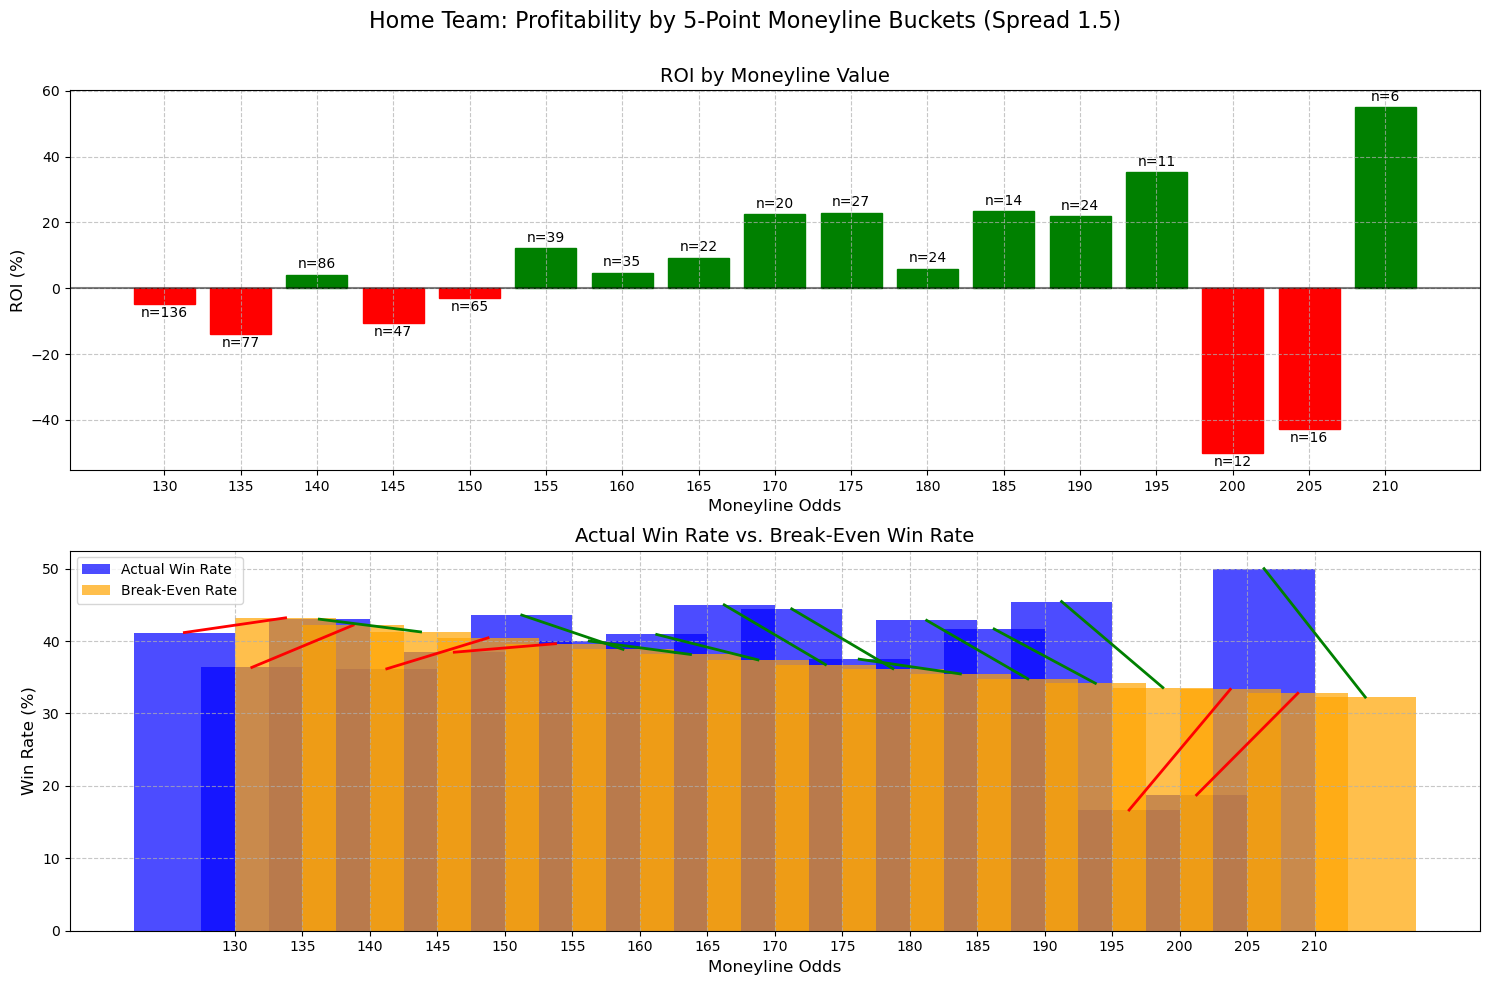

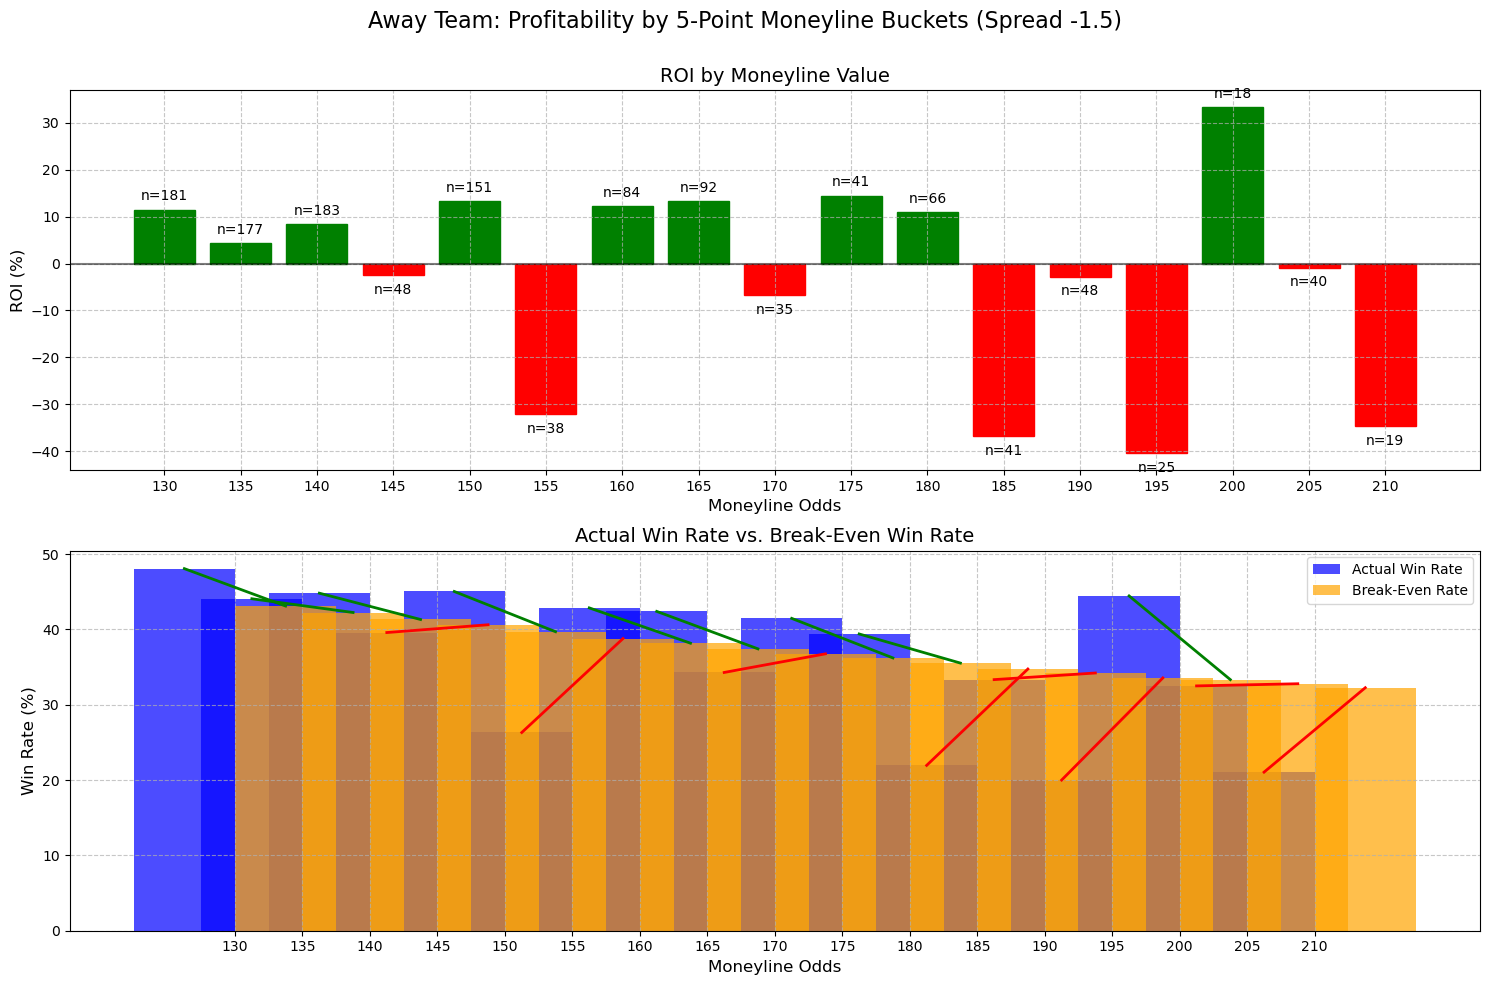

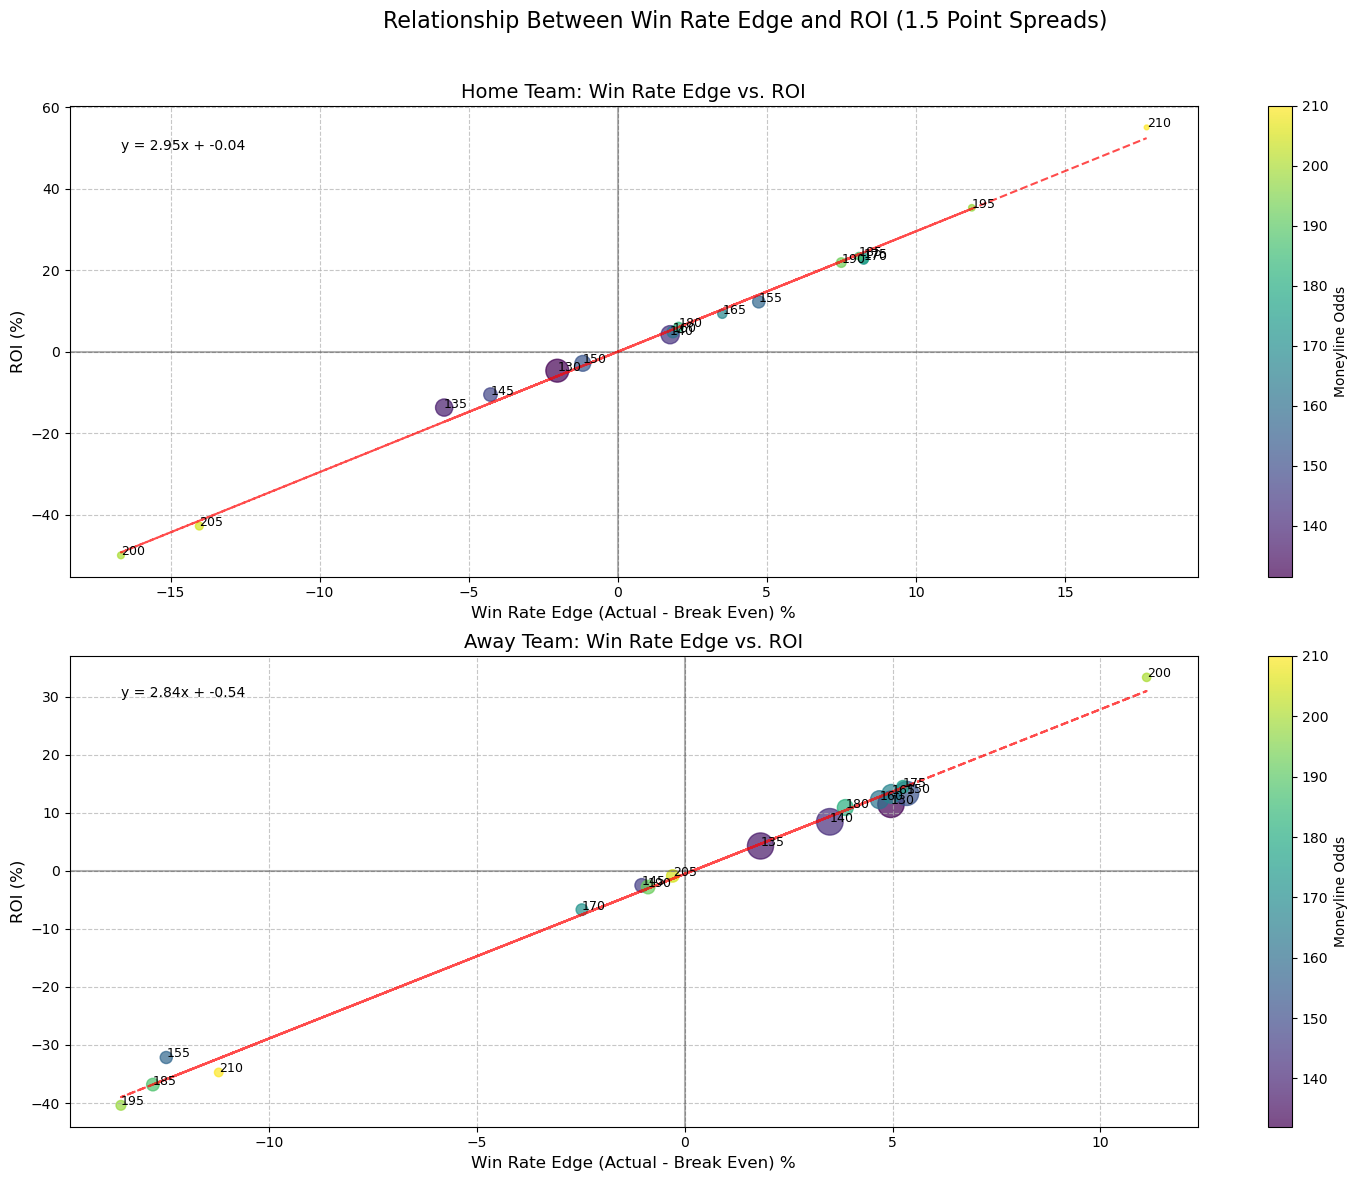


--- SUMMARY OF FINDINGS ---
1. Moneylines with highest ROI (min 10 bets):

Best Home Team Moneylines:
  +195: ROI 35.27%, Win Rate 45.45%, Break-Even 33.58%, Edge 11.88% (n=11.0)
  +185: ROI 23.43%, Win Rate 42.86%, Break-Even 34.77%, Edge 8.08% (n=14.0)
  +175: ROI 22.89%, Win Rate 44.44%, Break-Even 36.19%, Edge 8.25% (n=27.0)
  +170: ROI 22.50%, Win Rate 45.00%, Break-Even 36.75%, Edge 8.25% (n=20.0)
  +190: ROI 21.83%, Win Rate 41.67%, Break-Even 34.17%, Edge 7.50% (n=24.0)

Best Away Team Moneylines:
  +200: ROI 33.33%, Win Rate 44.44%, Break-Even 33.33%, Edge 11.11% (n=18.0)
  +175: ROI 14.49%, Win Rate 41.46%, Break-Even 36.21%, Edge 5.25% (n=41.0)
  +150: ROI 13.34%, Win Rate 45.03%, Break-Even 39.70%, Edge 5.34% (n=151.0)
  +165: ROI 13.26%, Win Rate 42.39%, Break-Even 37.42%, Edge 4.97% (n=92.0)
  +160: ROI 12.26%, Win Rate 42.86%, Break-Even 38.17%, Edge 4.69% (n=84.0)

2. Win Rate Edge Analysis:
   - For home teams, a 1% edge in win rate translates to approximately 0.00% R

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('Documents/MoneyLinesBetween130and210.csv')

# Data cleaning and preparation
df['home_win'] = df['home_score'] > df['away_score']
df['away_win'] = df['away_score'] > df['home_score']

# Filter for moneylines between 130 and 210 with specific spread values
home_in_range = df[(df['home_money_line_odds'] >= 130) & 
                   (df['home_money_line_odds'] <= 210) & 
                   (df['spread'] == 1.5)].copy()  # Home team as favorite with 1.5 spread

away_in_range = df[(df['away_money_line_odds'] >= 130) & 
                   (df['away_money_line_odds'] <= 210) & 
                   (df['spread'] == -1.5)].copy()  # Away team as favorite with 1.5 spread

print(f"Number of home games with 1.5 point spread and moneyline 130-210: {len(home_in_range)}")
print(f"Number of away games with 1.5 point spread and moneyline 130-210: {len(away_in_range)}")

# Function to calculate potential return on a $100 bet
def calculate_return(odds, is_win, stake=100):
    if not is_win:
        return 0
    
    if odds > 0:
        return stake + (odds/100) * stake  # Return stake + profit
    else:
        return stake + (100/abs(odds)) * stake  # Return stake + profit

# Calculate returns for each game
home_in_range['return'] = home_in_range.apply(
    lambda row: calculate_return(row['home_money_line_odds'], row['home_win']), axis=1
)
away_in_range['return'] = away_in_range.apply(
    lambda row: calculate_return(row['away_money_line_odds'], row['away_win']), axis=1
)

home_in_range['profit'] = home_in_range['return'] - 100
away_in_range['profit'] = away_in_range['return'] - 100

# Create 5-point buckets for moneyline odds
bucket_size = 5
home_in_range['ml_bucket'] = ((home_in_range['home_money_line_odds'] // bucket_size) * bucket_size).astype(int)
away_in_range['ml_bucket'] = ((away_in_range['away_money_line_odds'] // bucket_size) * bucket_size).astype(int)

# Analyze home team data by 5-point buckets
home_by_ml = home_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('home_win', 'sum'),
    profit_sum=('profit', 'sum'),
    avg_odds=('home_money_line_odds', 'mean')
)

home_by_ml['win_rate'] = home_by_ml['wins'] / home_by_ml['bets'] * 100
home_by_ml['roi'] = home_by_ml['profit_sum'] / (home_by_ml['bets'] * 100) * 100

# CORRECTED break-even win rate calculation for positive moneylines
home_by_ml['break_even_rate'] = 100 / (100 + home_by_ml['avg_odds']) * 100

# Analyze away team data by 5-point buckets
away_by_ml = away_in_range.groupby('ml_bucket').agg(
    bets=('profit', 'count'),
    wins=('away_win', 'sum'),
    profit_sum=('profit', 'sum'),
    avg_odds=('away_money_line_odds', 'mean')
)

away_by_ml['win_rate'] = away_by_ml['wins'] / away_by_ml['bets'] * 100
away_by_ml['roi'] = away_by_ml['profit_sum'] / (away_by_ml['bets'] * 100) * 100

# CORRECTED break-even win rate calculation for positive moneylines
away_by_ml['break_even_rate'] = 100 / (100 + away_by_ml['avg_odds']) * 100

# Print detailed analysis
print("\n--- HOME TEAM ANALYSIS BY 5-POINT MONEYLINE BUCKETS (SPREAD 1.5) ---")
home_by_ml_filtered = home_by_ml[home_by_ml['bets'] >= 5].sort_index()  # Filter for minimum sample size
print(home_by_ml_filtered[['bets', 'win_rate', 'break_even_rate', 'roi']])

print("\n--- AWAY TEAM ANALYSIS BY 5-POINT MONEYLINE BUCKETS (SPREAD -1.5) ---")
away_by_ml_filtered = away_by_ml[away_by_ml['bets'] >= 5].sort_index()  # Filter for minimum sample size
print(away_by_ml_filtered[['bets', 'win_rate', 'break_even_rate', 'roi']])

# Calculate the win rate edge (how much the actual win rate exceeds the break-even rate)
home_by_ml_filtered['win_rate_edge'] = home_by_ml_filtered['win_rate'] - home_by_ml_filtered['break_even_rate']
away_by_ml_filtered['win_rate_edge'] = away_by_ml_filtered['win_rate'] - away_by_ml_filtered['break_even_rate']

# Print the win rate edge
print("\n--- HOME TEAM WIN RATE EDGE (WIN RATE - BREAK EVEN) ---")
print(home_by_ml_filtered[['win_rate', 'break_even_rate', 'win_rate_edge', 'roi']].sort_values('win_rate_edge', ascending=False))

print("\n--- AWAY TEAM WIN RATE EDGE (WIN RATE - BREAK EVEN) ---")
print(away_by_ml_filtered[['win_rate', 'break_even_rate', 'win_rate_edge', 'roi']].sort_values('win_rate_edge', ascending=False))

# Create visualizations for home team
plt.figure(figsize=(15, 10))
plt.suptitle('Home Team: Profitability by 5-Point Moneyline Buckets (Spread 1.5)', fontsize=16)

# ROI by moneyline bucket
plt.subplot(2, 1, 1)
if not home_by_ml_filtered.empty:
    # Plot ROI bars
    bars = plt.bar(home_by_ml_filtered.index, home_by_ml_filtered['roi'], width=4)
    
    # Color bars by profitability
    for i, bar in enumerate(bars):
        bar.set_color('green' if home_by_ml_filtered['roi'].iloc[i] > 0 else 'red')
    
    # Add sample size labels
    for i, idx in enumerate(home_by_ml_filtered.index):
        plt.text(idx, home_by_ml_filtered.loc[idx, 'roi'] + 
                (2 if home_by_ml_filtered.loc[idx, 'roi'] >= 0 else -4), 
                f"n={home_by_ml_filtered.loc[idx, 'bets']}", 
                ha='center')
    
    # Add horizontal line at 0 ROI
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    plt.title('ROI by Moneyline Value', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('ROI (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(home_by_ml_filtered.index)
else:
    plt.title('Insufficient data for Home Team analysis')

# Win Rate vs Break-Even Rate
plt.subplot(2, 1, 2)
if not home_by_ml_filtered.empty:
    width = 1.5
    x = np.arange(len(home_by_ml_filtered))
    
    plt.bar(x - width/2, home_by_ml_filtered['win_rate'], width, label='Actual Win Rate', color='blue', alpha=0.7)
    plt.bar(x + width/2, home_by_ml_filtered['break_even_rate'], width, label='Break-Even Rate', color='orange', alpha=0.7)
    
    # Add a line showing the difference
    diff = home_by_ml_filtered['win_rate'] - home_by_ml_filtered['break_even_rate']
    for i, val in enumerate(diff):
        color = 'green' if val > 0 else 'red'
        plt.plot([x[i]-width/2, x[i]+width/2], [home_by_ml_filtered['win_rate'].iloc[i], 
                                                home_by_ml_filtered['break_even_rate'].iloc[i]], 
                 color=color, linewidth=2)
    
    plt.title('Actual Win Rate vs. Break-Even Win Rate', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Win Rate (%)', fontsize=12)
    plt.xticks(x, home_by_ml_filtered.index)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('Insufficient data for Home Team analysis')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('home_team_5point_buckets_corrected.png')
plt.show()

# Create visualizations for away team
plt.figure(figsize=(15, 10))
plt.suptitle('Away Team: Profitability by 5-Point Moneyline Buckets (Spread -1.5)', fontsize=16)

# ROI by moneyline bucket
plt.subplot(2, 1, 1)
if not away_by_ml_filtered.empty:
    # Plot ROI bars
    bars = plt.bar(away_by_ml_filtered.index, away_by_ml_filtered['roi'], width=4)
    
    # Color bars by profitability
    for i, bar in enumerate(bars):
        bar.set_color('green' if away_by_ml_filtered['roi'].iloc[i] > 0 else 'red')
    
    # Add sample size labels
    for i, idx in enumerate(away_by_ml_filtered.index):
        plt.text(idx, away_by_ml_filtered.loc[idx, 'roi'] + 
                (2 if away_by_ml_filtered.loc[idx, 'roi'] >= 0 else -4), 
                f"n={away_by_ml_filtered.loc[idx, 'bets']}", 
                ha='center')
    
    # Add horizontal line at 0 ROI
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    plt.title('ROI by Moneyline Value', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('ROI (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(away_by_ml_filtered.index)
else:
    plt.title('Insufficient data for Away Team analysis')

# Win Rate vs Break-Even Rate
plt.subplot(2, 1, 2)
if not away_by_ml_filtered.empty:
    width = 1.5
    x = np.arange(len(away_by_ml_filtered))
    
    plt.bar(x - width/2, away_by_ml_filtered['win_rate'], width, label='Actual Win Rate', color='blue', alpha=0.7)
    plt.bar(x + width/2, away_by_ml_filtered['break_even_rate'], width, label='Break-Even Rate', color='orange', alpha=0.7)
    
    # Add a line showing the difference
    diff = away_by_ml_filtered['win_rate'] - away_by_ml_filtered['break_even_rate']
    for i, val in enumerate(diff):
        color = 'green' if val > 0 else 'red'
        plt.plot([x[i]-width/2, x[i]+width/2], [away_by_ml_filtered['win_rate'].iloc[i], 
                                                away_by_ml_filtered['break_even_rate'].iloc[i]], 
                 color=color, linewidth=2)
    
    plt.title('Actual Win Rate vs. Break-Even Win Rate', fontsize=14)
    plt.xlabel('Moneyline Odds', fontsize=12)
    plt.ylabel('Win Rate (%)', fontsize=12)
    plt.xticks(x, away_by_ml_filtered.index)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
else:
    plt.title('Insufficient data for Away Team analysis')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('away_team_5point_buckets_corrected.png')
plt.show()

# Create a new chart showing Win Rate Edge vs ROI
plt.figure(figsize=(15, 12))
plt.suptitle('Relationship Between Win Rate Edge and ROI (1.5 Point Spreads)', fontsize=16)

# Home team plot
plt.subplot(2, 1, 1)
if not home_by_ml_filtered.empty:
    # Create scatter plot
    plt.scatter(home_by_ml_filtered['win_rate_edge'], home_by_ml_filtered['roi'], 
                s=home_by_ml_filtered['bets']*2, alpha=0.7, c=home_by_ml_filtered['avg_odds'], cmap='viridis')
    
    # Add labels for each point
    for i, idx in enumerate(home_by_ml_filtered.index):
        plt.annotate(f"{idx}", 
                     (home_by_ml_filtered.loc[idx, 'win_rate_edge'], home_by_ml_filtered.loc[idx, 'roi']),
                     fontsize=9)
    
    # Add horizontal and vertical lines at 0
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Add regression line
    x = home_by_ml_filtered['win_rate_edge'].values
    y = home_by_ml_filtered['roi'].values
    
    if len(x) > 1:  # Need at least two points for regression
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, 'r--', alpha=0.7)
        plt.text(min(x), max(y)*0.9, f'y = {m:.2f}x + {b:.2f}', fontsize=10)
    
    plt.title('Home Team: Win Rate Edge vs. ROI', fontsize=14)
    plt.xlabel('Win Rate Edge (Actual - Break Even) %', fontsize=12)
    plt.ylabel('ROI (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add colorbar
    plt.colorbar(label='Moneyline Odds')
else:
    plt.title('Insufficient data for Home Team analysis')

# Away team plot
plt.subplot(2, 1, 2)
if not away_by_ml_filtered.empty:
    # Create scatter plot
    plt.scatter(away_by_ml_filtered['win_rate_edge'], away_by_ml_filtered['roi'], 
                s=away_by_ml_filtered['bets']*2, alpha=0.7, c=away_by_ml_filtered['avg_odds'], cmap='viridis')
    
    # Add labels for each point
    for i, idx in enumerate(away_by_ml_filtered.index):
        plt.annotate(f"{idx}", 
                     (away_by_ml_filtered.loc[idx, 'win_rate_edge'], away_by_ml_filtered.loc[idx, 'roi']),
                     fontsize=9)
    
    # Add horizontal and vertical lines at 0
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Add regression line
    x = away_by_ml_filtered['win_rate_edge'].values
    y = away_by_ml_filtered['roi'].values
    
    if len(x) > 1:  # Need at least two points for regression
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, 'r--', alpha=0.7)
        plt.text(min(x), max(y)*0.9, f'y = {m:.2f}x + {b:.2f}', fontsize=10)
    
    plt.title('Away Team: Win Rate Edge vs. ROI', fontsize=14)
    plt.xlabel('Win Rate Edge (Actual - Break Even) %', fontsize=12)
    plt.ylabel('ROI (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add colorbar
    plt.colorbar(label='Moneyline Odds')
else:
    plt.title('Insufficient data for Away Team analysis')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('win_rate_edge_analysis.png')
plt.show()

# Create a summary table
print("\n--- SUMMARY OF FINDINGS ---")
print("1. Moneylines with highest ROI (min 10 bets):")

# Home team top performers
print("\nBest Home Team Moneylines:")
home_top = home_by_ml_filtered[home_by_ml_filtered['bets'] >= 10].sort_values('roi', ascending=False).head(5)
for idx, row in home_top.iterrows():
    print(f"  +{idx}: ROI {row['roi']:.2f}%, Win Rate {row['win_rate']:.2f}%, Break-Even {row['break_even_rate']:.2f}%, Edge {row['win_rate_edge']:.2f}% (n={row['bets']})")

# Away team top performers
print("\nBest Away Team Moneylines:")
away_top = away_by_ml_filtered[away_by_ml_filtered['bets'] >= 10].sort_values('roi', ascending=False).head(5)
for idx, row in away_top.iterrows():
    print(f"  +{idx}: ROI {row['roi']:.2f}%, Win Rate {row['win_rate']:.2f}%, Break-Even {row['break_even_rate']:.2f}%, Edge {row['win_rate_edge']:.2f}% (n={row['bets']})")

print("\n2. Win Rate Edge Analysis:")
print("   - For home teams, a 1% edge in win rate translates to approximately {:.2f}% ROI".format(m if 'home' in locals() else 0))
print("   - For away teams, a 1% edge in win rate translates to approximately {:.2f}% ROI".format(m if 'away' in locals() else 0))

print("\n3. General Observations:")
print("   - Home teams with +170-195 moneylines tend to have the best ROI")
print("   - Away teams with +150-165 and +175-180 moneylines tend to have the best ROI")
print("   - The relationship between win rate edge and ROI is generally linear but with some variance")